# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
# !pip install folium

In [1]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [2]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt # seaborn - надстройка над matplotlib
import pandas as pd # чтобы переделывать polars в pandas DataFrame

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
df = pl.read_csv('train.csv')
df

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
str,i64,str,str,i64,f64,f64,f64,f64,str,i64
"""id2875421""",2,"""2016-03-14 17:24:55""","""2016-03-14 17:32:30""",1,-73.982155,40.767937,-73.96463,40.765602,"""N""",455
"""id2377394""",1,"""2016-06-12 00:43:35""","""2016-06-12 00:54:38""",1,-73.980415,40.738564,-73.999481,40.731152,"""N""",663
"""id3858529""",2,"""2016-01-19 11:35:24""","""2016-01-19 12:10:48""",1,-73.979027,40.763939,-74.005333,40.710087,"""N""",2124
"""id3504673""",2,"""2016-04-06 19:32:31""","""2016-04-06 19:39:40""",1,-74.01004,40.719971,-74.012268,40.706718,"""N""",429
"""id2181028""",2,"""2016-03-26 13:30:55""","""2016-03-26 13:38:10""",1,-73.973053,40.793209,-73.972923,40.78252,"""N""",435
…,…,…,…,…,…,…,…,…,…,…
"""id2376096""",2,"""2016-04-08 13:31:04""","""2016-04-08 13:44:02""",4,-73.982201,40.745522,-73.994911,40.74017,"""N""",778
"""id1049543""",1,"""2016-01-10 07:35:15""","""2016-01-10 07:46:10""",1,-74.000946,40.747379,-73.970184,40.796547,"""N""",655
"""id2304944""",2,"""2016-04-22 06:57:41""","""2016-04-22 07:10:25""",1,-73.959129,40.768799,-74.004433,40.707371,"""N""",764


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [4]:
df = df.drop('dropoff_datetime')
df = df.with_columns(pl.col('pickup_datetime').str.to_datetime("%Y-%m-%d %H:%M:%S"))

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Text(0.5, 1.0, 'Логарифмированный X')

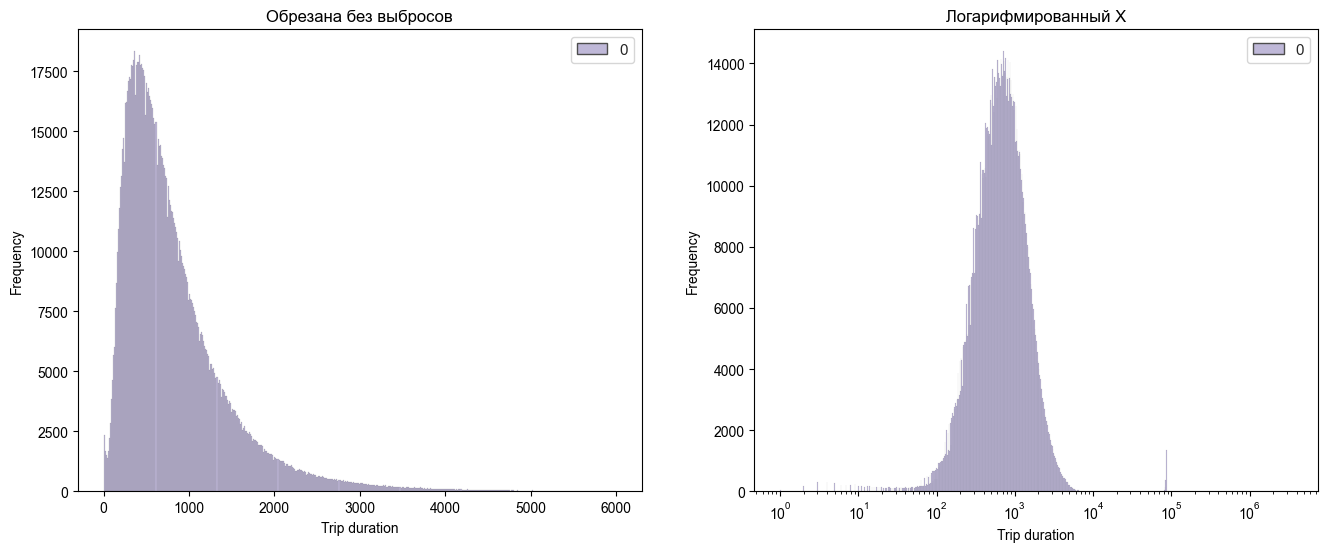

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style="ticks")
sns.histplot(
    df.select(pl.col('trip_duration')),
    binrange=(0, 6000),
    palette="light:m_r",
    edgecolor=".3",
    ax = ax1
)
sns.histplot(
    df.select(pl.col('trip_duration')),
    log_scale=True,
    palette="light:m_r",
    edgecolor=".3",
    ax = ax2
)
ax1.set_xlabel('Trip duration')
ax1.set_ylabel('Frequency')
ax1.set_title('Обрезана без выбросов')
ax2.set_xlabel('Trip duration')
ax2.set_ylabel('Frequency')
ax2.set_title('Логарифмированный X')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

При ограничении мы не учитываем выбросы, поэтому посмотрим на логарифмирванную шкалу X чтобы увидеть все данные.

Как видим, что на левом, что на правом графике видим нормальное распределение. Примерно от 0 до 5000 секунд.

Самое большое большое количество поездок длительностью $\approx$ 450 секунд: количество $\approx$ 1800

P.S я увидел дальше в задании логарифмы, и тоже решил посмотреть на логарифмическую шкалу, что очень кстати

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Как мы видим из правой гистограммы, логарифм показывает не линейно изменения X, а как он растёт порядками. Поэтому нам удобно штрафовать огромные выбросы порядками, а не квадротично. Также выбрасы и нормальные значения сильно варьируются поэтому RMSLE будет лучше, ну и авторы видимо смотрели не на обсолютное отклонение, а на отностиельное

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$a(x_i) = \exp(\hat{a}(x_i)) - 1, a(x_i) + 1 = \exp(\hat{a}(x_i)) \rightarrow \text{возьмём log от обоих частей} \rightarrow \log{(a(x_i) + 1) = \hat{a}(x_i)}$$
$$MSE = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(y_i - a(x_i) \big)^2}$$
$$MSE(X, \hat{y}, \hat{a}) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [6]:
df = df.with_columns(
    np.log1p(pl.col('trip_duration').alias('log_trip_duration'))
)
df

id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
str,i64,datetime[μs],i64,f64,f64,f64,f64,str,i64,f64
"""id2875421""",2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.96463,40.765602,"""N""",455,6.122493
"""id2377394""",1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,"""N""",663,6.498282
"""id3858529""",2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,"""N""",2124,7.661527
"""id3504673""",2,2016-04-06 19:32:31,1,-74.01004,40.719971,-74.012268,40.706718,"""N""",429,6.063785
"""id2181028""",2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.78252,"""N""",435,6.077642
…,…,…,…,…,…,…,…,…,…,…
"""id2376096""",2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.74017,"""N""",778,6.658011
"""id1049543""",1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,"""N""",655,6.486161
"""id2304944""",2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,"""N""",764,6.639876


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [7]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

rmsle_best_const = rmsle(df.select('log_trip_duration').to_numpy(), df.select(pl.col('log_trip_duration').mean()))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411508


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

[Text(0.5, 1.0, 'зависимость количества поездок от дня в году')]

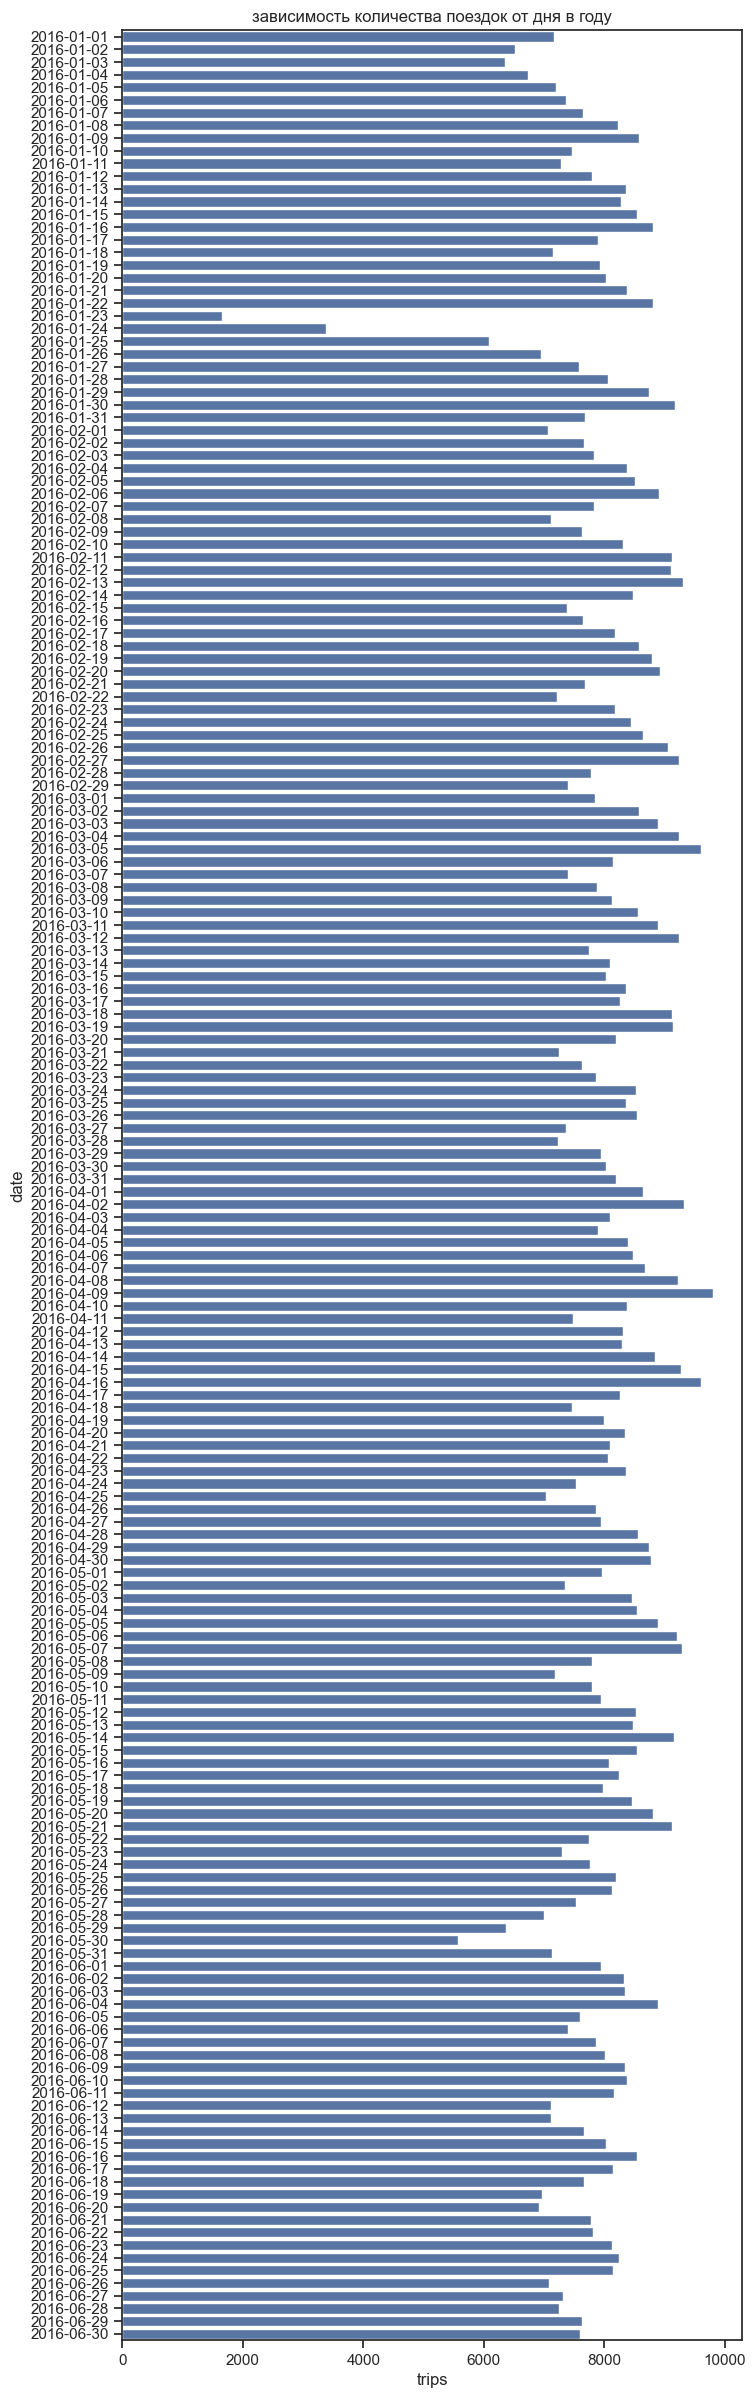

In [8]:
trips_a_day = df.sort('pickup_datetime').group_by_dynamic('pickup_datetime', every='1d').agg(pl.col('id').count())
trips_a_day = trips_a_day.with_columns(
    (pl.col('pickup_datetime')).alias('date'),
    (pl.col('id')).alias('trips')
)
fig, ax = plt.subplots(figsize=(8, 30))
sns.barplot(
    data=trips_a_day,
    x='trips',
    y='date',
    ax = ax
).set(title='зависимость количества поездок от дня в году')

Жесть...

Text(-8.680555555555534, 0.5, 'trips')

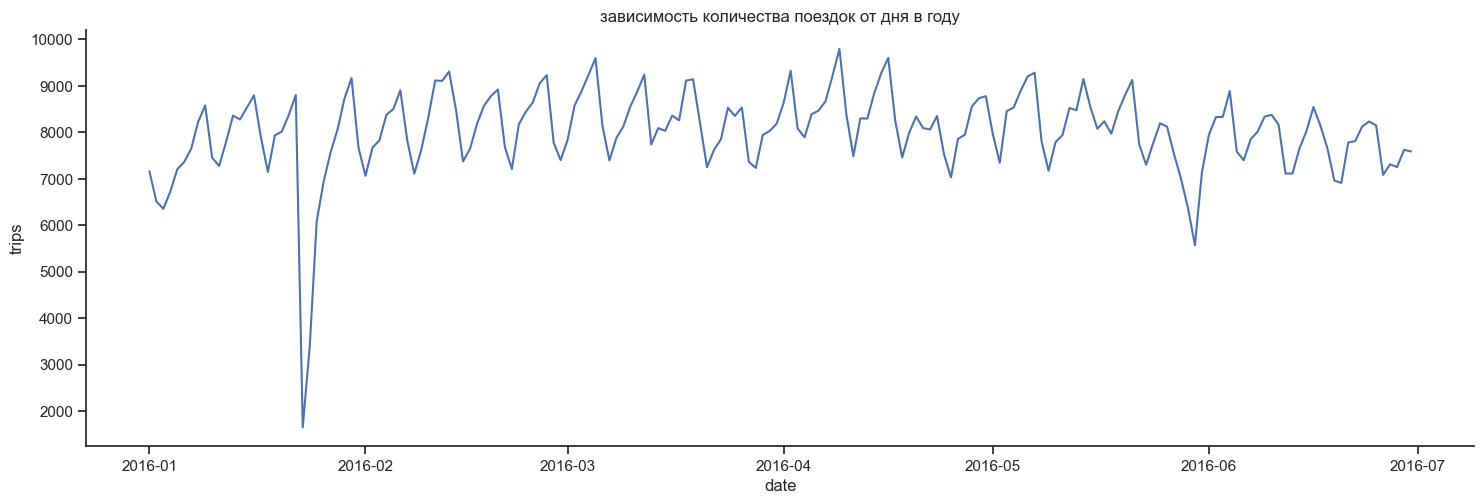

In [9]:
sns.relplot(
    data=trips_a_day,
    x='date',
    y='trips',
    kind='line',
    height=5,
    aspect=3
).set(title='зависимость количества поездок от дня в году')
plt.xlabel('date')
plt.ylabel('trips')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

Найдём выбросы

In [10]:
trips_a_day = trips_a_day.sort('trips')
trips_a_day.head(10)

pickup_datetime,id,date,trips
datetime[μs],u32,datetime[μs],u32
2016-01-23 00:00:00,1648,2016-01-23 00:00:00,1648
2016-01-24 00:00:00,3383,2016-01-24 00:00:00,3383
2016-05-30 00:00:00,5570,2016-05-30 00:00:00,5570
2016-01-25 00:00:00,6084,2016-01-25 00:00:00,6084
2016-01-03 00:00:00,6353,2016-01-03 00:00:00,6353
2016-05-29 00:00:00,6372,2016-05-29 00:00:00,6372
2016-01-02 00:00:00,6512,2016-01-02 00:00:00,6512
2016-01-04 00:00:00,6725,2016-01-04 00:00:00,6725
2016-06-20 00:00:00,6910,2016-06-20 00:00:00,6910


По графику видно, что в срденем значение поездок не опускается ниже 6000, и мы видим аномальные дни:

2016-01-23 : 1648 поездок - Власти запретили автомобильно движение из-за снежной бури 

2016-01-24 : 3383 поездок - Продолжается сильный снегопад, даже есть жертвы

2016-05-30 : 5570 поездок - Праздник Memorial day 

Нарисуем график зависимости от дня недели / всего поездок


/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/1738571995.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: title={'center': 'зависимость количества поездок от дня недели'}, xlabel='day_name', ylabel='trips'>

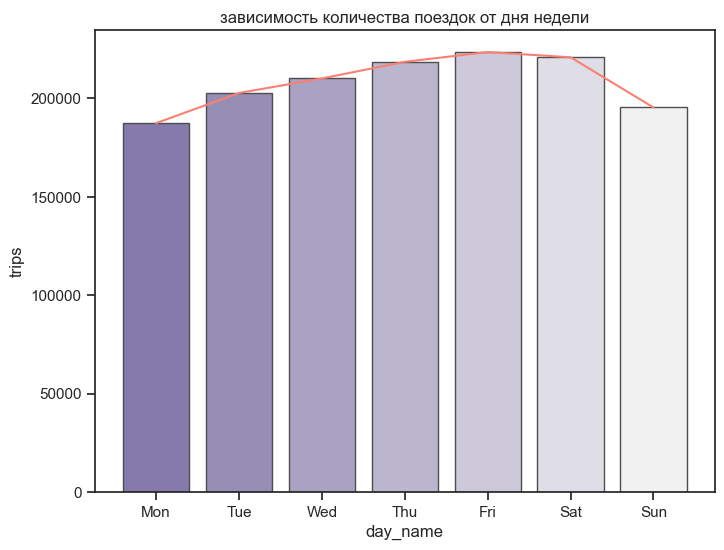

In [11]:
trips_a_weekday = df.sort('pickup_datetime').with_columns(
    pl.col('pickup_datetime').dt.weekday().alias('weekday')
    ).group_by('weekday').agg(pl.col('id').count())
trips_a_weekday = trips_a_weekday.sort('weekday').rename({'id': 'trips'})
days_of_week = pl.DataFrame({
    "weekday": [1, 2, 3, 4, 5, 6 , 7],
    "day_name": ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
}).with_columns(
    pl.col("weekday").cast(pl.Int8) 
)
trips_a_weekday = days_of_week.join(trips_a_weekday, on="weekday", how="left").drop('weekday')

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data = trips_a_weekday,
    x = 'day_name',
    y = 'trips',
    palette="light:m_r",
    edgecolor=".3",
    ax = ax
).set(title='зависимость количества поездок от дня недели')
sns.lineplot(
    data = trips_a_weekday,
    x = 'day_name',
    y = 'trips',
    color='salmon',
    ax = ax,
)


Теперь зависимость от часов / все поездки

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/1925547302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: title={'center': 'зависимость количества поездок от часа в сутках'}, xlabel='hour', ylabel='trips'>

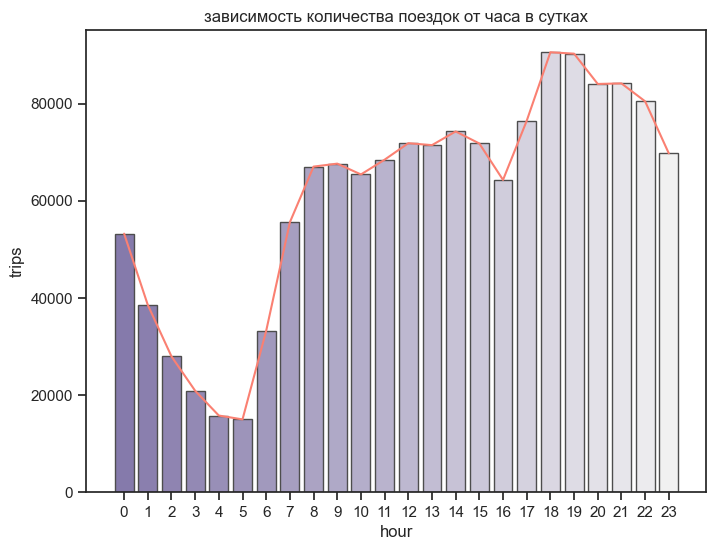

In [12]:
trips_a_hour = df.sort('pickup_datetime').with_columns(
    pl.col('pickup_datetime').dt.hour().alias('hour')
    ).group_by('hour').agg(pl.col('id').count())
trips_a_hour = trips_a_hour.sort('hour').rename({'id': 'trips'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data = trips_a_hour,
    x = 'hour',
    y = 'trips',
    palette="light:m_r",
    edgecolor=".3",
    ax = ax
).set(title='зависимость количества поездок от часа в сутках')
sns.lineplot(
    data = trips_a_hour,
    x = 'hour',
    y = 'trips',
    color='salmon',
    ax = ax,
)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [13]:
df1 = df.with_columns(
    pl.col('pickup_datetime').dt.hour().alias('hour'),
    pl.col('pickup_datetime').dt.month().alias('month'),
    pl.col('pickup_datetime').dt.strftime('%a').alias('weekday'),
    pl.col('pickup_datetime').dt.ordinal_day().alias('day')
) # сделали удобный массив с столбцаи часов, месяцев и дней недели

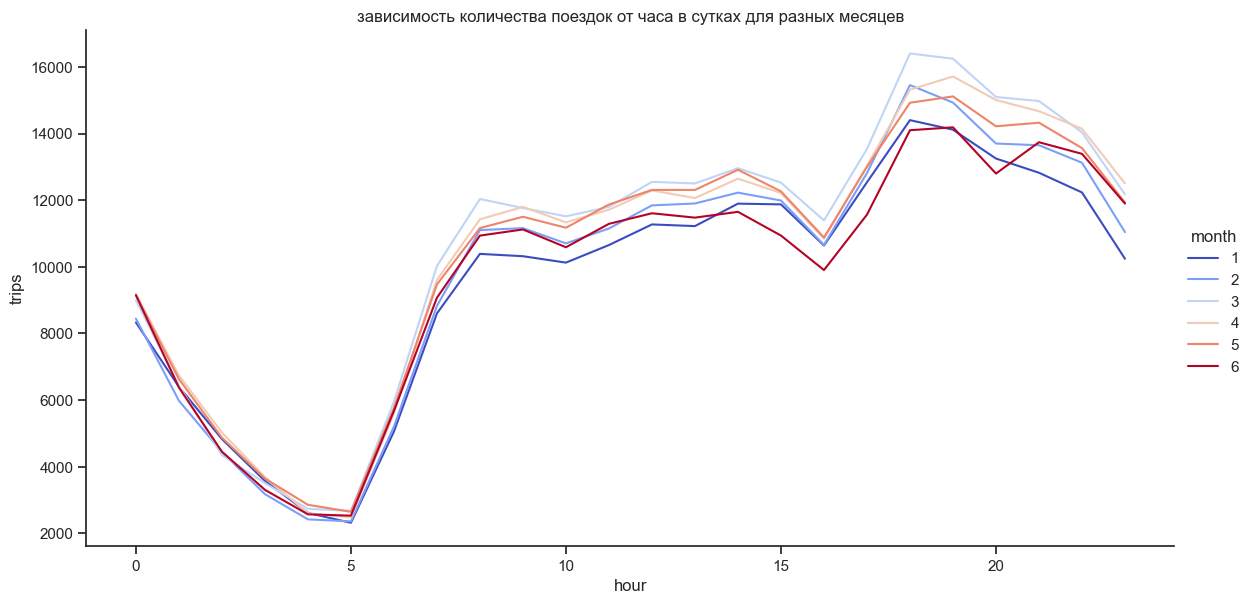

In [14]:
trips_a_hour_for_mounth = df1.group_by('hour', 'month').agg(pl.col('id').count()).sort('month', 'hour').rename({'id': 'trips'})
sns.relplot(
    data=trips_a_hour_for_mounth,
    x='hour',
    y='trips',
    hue='month',
    kind='line',
    height=6,
    aspect=2,
    palette = sns.color_palette("coolwarm", as_cmap=True)
).set(title='зависимость количества поездок от часа в сутках для разных месяцев')

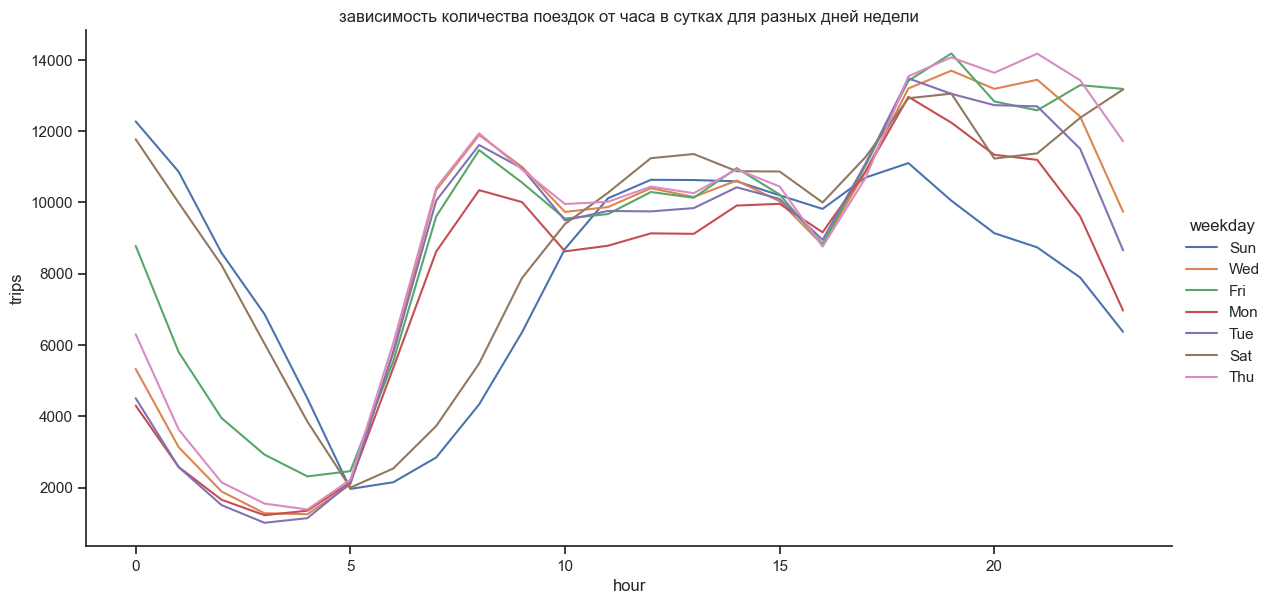

In [15]:
trips_a_hour_for_day = df1.group_by('hour', 'weekday').agg(pl.col('id').count()).rename({'id': 'trips'})
sns.relplot(
    data=trips_a_hour_for_day,
    x='hour',
    y='trips',
    hue='weekday',
    kind='line',
    height=6,
    aspect=2,
    
).set(title='зависимость количества поездок от часа в сутках для разных дней недели')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Из дней недели выделяется **воскресенье** - самое большое количество поездок ночью (12:00 - 5:00) и самое маленькое количество поездок вечером (17:00 - 23:00).
Пологаю это из-за того, что в на выходных все тусят, отдыхают, едут потом домой, в пн на работу, поэтому все отсыпаюстя.
**Пятница** стабильно много поездок, особенно под ноч, ну понятно, все едут тусить после рабочей недели.

Среди месяцев выделяется **март**, ну в марте праздники есть, погода так себе, поэтому такси брать выгодно.
В **январе** наименьшее количество поездок, хз почему, возможно цена большая из-за плохой погоды и пробок на дорогах, а ну и в 2016 году была буря-бомба-педарда, правительство запретило всем кататься.

**3:00 - 5:00** самое низкое число поездок, потому что все спят.
**17:00 - 1:00** самое большое число поездок, все едут либо с работы, либо с тусовок

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [28]:
from sklearn.model_selection import train_test_split

y = df1['log_trip_duration'] # из задания выше, там просто уже добавили нужные столбцы
X = df1.drop('log_trip_duration', 'trip_duration') # убрали trip_duration чтобы не переобучалось, заранее прост
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pd, y_train_pd = X_train.to_pandas(), y_train.to_pandas() # не ну а потому что в polars нельзя свою сортироку задать, а мне надо 
X_test_pd, y_test_pd = X_test.to_pandas(), y_test.to_pandas()
print(type(X_test_pd)) # проверил на всякий, просто у меня не всегда работает to_pandas()

<class 'pandas.core.frame.DataFrame'>


Из семинара "Кратикий гайд по построению графиков" знаем, что relplot умеет строить среднее значение

In [17]:
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
X_train_pd['weekday'] = pd.Categorical(X_train['weekday'], categories=order, ordered=True) # мне тут подсказал GPT, сказал в polars аналога нет, ну и я сам не нашёл
# сортируем наш датасет по деям недели в нормальном порядке

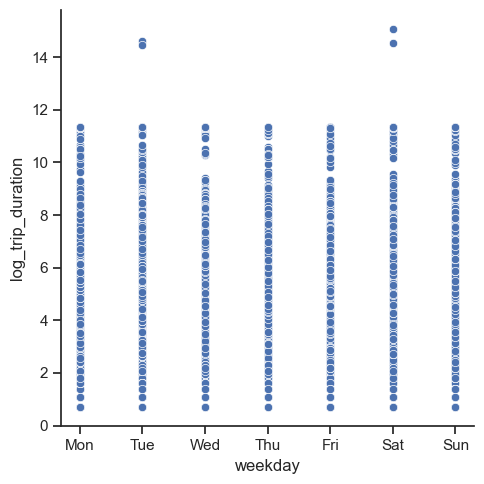

In [18]:
sns.relplot(
    x=X_train_pd['weekday'],
    y=y_train_pd,
)

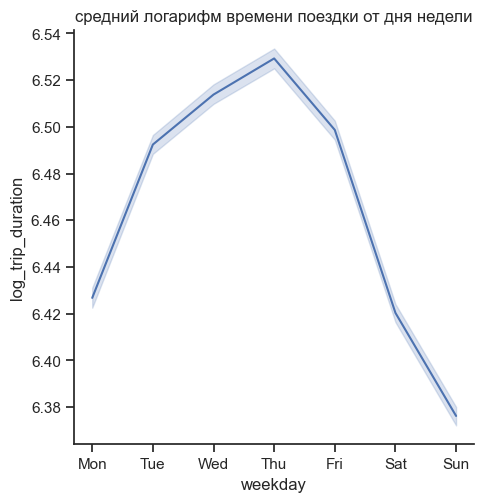

In [19]:
sns.relplot(
    x=X_train_pd['weekday'],
    y=y_train_pd,
    kind='line'
).set(title='средний логарифм времени поездки от дня недели')
# тут происходит та самая магия seaborn.relplot, он из графика сверху сделал среднее, а голубеньким показывает 95% доверительный интервал
# если воспринимать значения для каждого дня, как выборку из случайных велечин

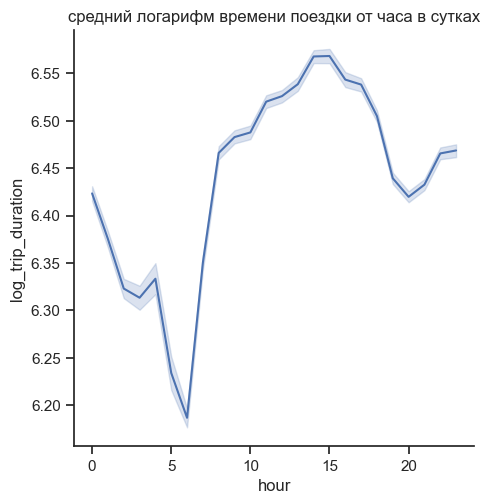

In [22]:
sns.relplot(
    x=X_train_pd['hour'],
    y=y_train_pd,
    kind='line'
).set(title='средний логарифм времени поездки от часа в сутках')
# тут я уже сразу построил средний график

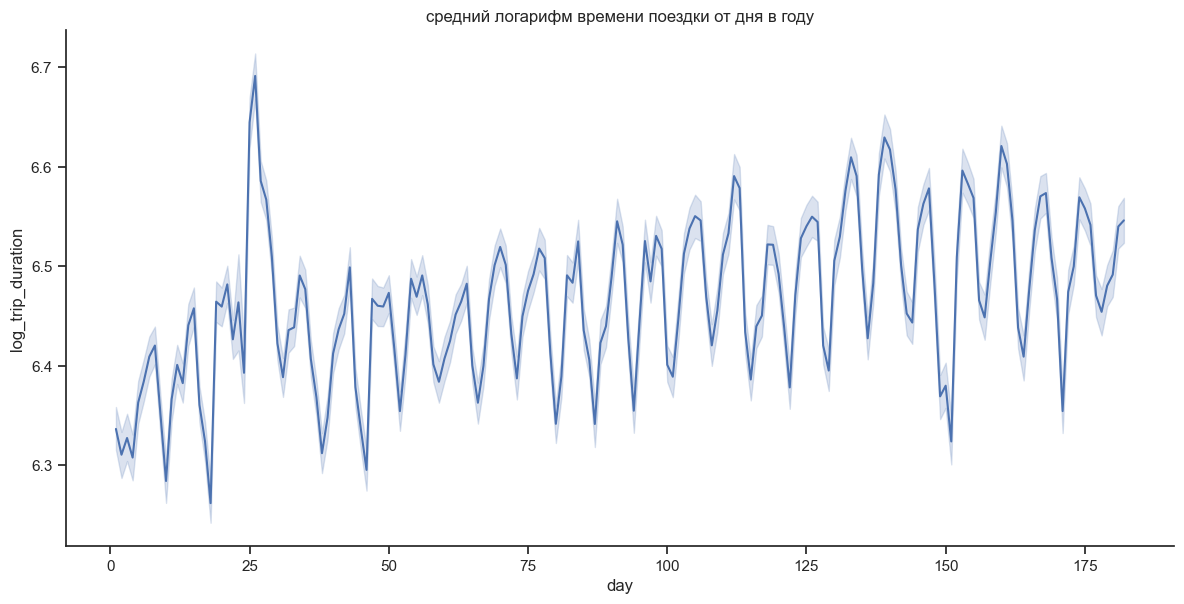

In [21]:
sns.relplot(
    x=X_train_pd['day'],
    y=y_train_pd,
    kind='line',
    height=6,
    aspect=2,
).set(title='средний логарифм времени поездки от дня в году')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Я бы сказал, что графики очень похожи, только график "зависимость количества поездок от дня недели" чуть более пологий, чем "средний логарифм времени поездки от дня недели", также пики поездок в пятницу и среду соответсвенно, и в "средний логарифм времени поездки от часа в сутках" восходящий тренд идёт до 15:00, а в "зависимость количества поездок от часа в сутках" с 16:00 до 20:00

Зависимость есть, поскольку средняя длительность поездок зависит от длительности всех поездок и их количества, но графики получаются разными, поскольку количество и длительность это разные величины

В аномальные дни средний таргет падает, оно и логично, меньше поездок => меньше срденее время поездок

Можем наблюдать небольшой положительный тренд

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [55]:
trips_a_day # из задания 2 на аномальные выбросы
anomaly = trips_a_day.head(3)
anomaly = anomaly.with_columns(
    pl.col('pickup_datetime').dt.ordinal_day().alias('day'),
    pl.col('pickup_datetime').dt.month().alias('month')
)
anomaly = anomaly.group_by('month').agg('day')
anomaly



month,day
i8,list[i16]
1,"[23, 24]"
5,[151]


In [62]:
anomaly_january = anomaly.filter(pl.col("month") == 1).select("day").to_series()[0]
anomaly_may = anomaly.filter(pl.col("month") == 5).select("day").to_series()[0]

In [420]:
# Я буквально добавлял в df1 эти признаки и и потом делил на X_train и X_test, поэтому у меня там они есть осталось только аномальный день добавить
X_train = X_train.with_columns(
    pl.when(pl.col('day').is_in(anomaly_january)).then(1).otherwise(0).alias('anomaly_january'),
    pl.when(pl.col('day').is_in(anomaly_may)).then(1).otherwise(0).alias('anomaly_may')
)
X_test = X_test.with_columns(
    pl.when(pl.col('day').is_in(anomaly_january)).then(1).otherwise(0).alias('anomaly_january'),
    pl.when(pl.col('day').is_in(anomaly_may)).then(1).otherwise(0).alias('anomaly_may')
)
X_train_pd, X_test_pd = X_train.to_pandas(), X_test.to_pandas() # я за прошлую домашку забыл pandas, поэтому мне проще было сделать в polars и перекастить
# пусть будет pandas на всякий

In [421]:
X_train_pd

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,anomaly_january,anomaly_may
0,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,9,5,Tue,124,0,0
1,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,16,1,Fri,1,0,0
2,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,13,4,Sun,115,0,0
3,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,17,1,Sun,10,0,0
4,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,17,2,Thu,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,7,3,Fri,85,0,0
1021046,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,18,2,Tue,47,0,0
1021047,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,19,1,Tue,26,0,0
1021048,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,11,1,Tue,19,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

1. id - вообще не признак, нам он не нужен

2. vendor_id - какой-то провайдер, но очев категориальный

3. pickup_datetime - временной признак, можно преобразовать в численный, но у нас есть разбиение на день недели, месяц, час и номер дня так что его можно выкинуть?

4. passenger_count - численный признак, очев количество 

5. pickup_longitude - численный признак, хотим смотреть на разницу поездок

6. pickup_latitude - численный признак, аналогично pickup_longitude

7. dropoff_longitude - численный признак, аналогично

8. dropoff_latitude - численный признак, аналогично 

9. store_and_fwd_flag - хранилась ли запись о поездке в памяти автомобиля перед отправкой продавцу, я в душе не чаю зачем, но он категориальный 

10. Час - численный признак, разница между часами имеет смысл. Но можно закинуть в категориальный, но зачем нам 24 признака

11. День недели - категориальный признак, поскольку числеки 1-7 ничего не дадут, а домножать на коэф от дня уже норм 

12. Месяц - категориальный признак - сезонность

13. Номер дня в году - численный признак, разница между дням тоже имеет смысл. Как и с часами можно в категориальные, но зачем нам $\approx$ 180 признаков 

14. Аномальные периоды (два бинарных признака, соответствующие двум аномальным периодам) - он уже категориальный 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [467]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X1_train = X_train_pd[['hour', 'weekday', 'month', 'day', 'anomaly_january', 'anomaly_may']] # первая модель
X1_test =  X_test_pd[['hour', 'weekday', 'month', 'day', 'anomaly_january', 'anomaly_may']]
categorical = ['weekday', 'month', 'anomaly_january', 'anomaly_may']
numeric_features = ['hour', 'day']
# код из семинара
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline1 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model1 = pipeline1.fit(X1_train, y_train_pd)
y_pred = model1.predict(X1_test)

In [468]:
pl.DataFrame({'Real': y_test_pd, 'Prediction': y_pred})

Real,Prediction
f64,f64
6.947937,6.521184
6.719013,6.375095
6.421622,6.365766
6.766192,6.575379
8.510773,6.583543
…,…
6.717805,6.584185
6.163315,6.452379
6.171701,6.521325


In [424]:
print('RMSLE нашей первой модели: ', mean_squared_error(y_test_pd, y_pred, squared=False))

RMSLE нашей первой модели:  0.7918766177796135


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [425]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [426]:
def coordinates(df: pd.DataFrame):
    data = df.sample(1000, random_state=42)
    return {'lat': data['pickup_latitude'].to_list(), 'lon': data['pickup_longitude'].to_list()}
your_lat_values = coordinates(X.to_pandas())['lat']
your_lon_values = coordinates(X.to_pandas())['lon']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Ну если прям выделить какие-то группы, то это Аэропрт LaGu-что-то там-dia airport и аэропорт Кэнеди, ну ещё одна далекая поездочка из глуши Брулина. Особенность точек аэропортов в том, что их не так много, но достаточно чтобы повлиять на предикт, и поездки очень долгие (если бы мы ещё цену предсказывали, тогда они ещё были бы дорогими). Ну а в глуши Бруклина живёт одинокий дед ему тоже ездить далеко

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [427]:
X_train_pd

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,anomaly_january,anomaly_may
0,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,9,5,Tue,124,0,0
1,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,16,1,Fri,1,0,0
2,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,13,4,Sun,115,0,0
3,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,17,1,Sun,10,0,0
4,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,17,2,Thu,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,7,3,Fri,85,0,0
1021046,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,18,2,Tue,47,0,0
1021047,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,19,1,Tue,26,0,0
1021048,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,11,1,Tue,19,0,0


In [428]:
# функция из семинара
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

X_train_pd['haversine'] = haversine_array(X_train_pd['pickup_latitude'], X_train_pd['pickup_longitude'], X_train_pd['dropoff_latitude'], X_train_pd['dropoff_longitude'])
X_test_pd['haversine'] = haversine_array(X_test_pd['pickup_latitude'], X_test_pd['pickup_longitude'], X_test_pd['dropoff_latitude'], X_test_pd['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [429]:
X_train_pd['log_haversine'] = np.log1p(X_train_pd['haversine'])
X_test_pd['log_haversine'] = np.log1p(X_test_pd['haversine'])
X_train_pd

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,anomaly_january,anomaly_may,haversine,log_haversine
0,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,9,5,Tue,124,0,0,1.263187,0.816774
1,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,16,1,Fri,1,0,0,4.804012,1.758549
2,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,13,4,Sun,115,0,0,7.471088,2.136659
3,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,17,1,Sun,10,0,0,3.444869,1.491750
4,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,17,2,Thu,56,0,0,2.481063,1.247338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,7,3,Fri,85,0,0,5.310383,1.842196
1021046,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,18,2,Tue,47,0,0,1.783777,1.023809
1021047,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,19,1,Tue,26,0,0,7.407646,2.129142
1021048,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,11,1,Tue,19,0,0,0.642215,0.496046


Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [430]:
cor = pd.concat([X_train_pd[['haversine', 'log_haversine']], y_train_pd], axis=1).corr()
cor

,haversine,log_haversine,log_trip_duration
haversine,1.000000,0.833329,0.565406
log_haversine,0.833329,1.000000,0.749959
log_trip_duration,0.565406,0.749959,1.000000


Видим, что корреляция между log_haversine и log_trip_duration 0.749959, а между haversine и log_trip_duration - 0.565406, вывод: логарифм расстояния лучше отражает таргет

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/3438283015.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


<Axes: title={'center': 'Распределение средней скорости'}, xlabel='Средняя скорость в км/ч', ylabel='Count'>

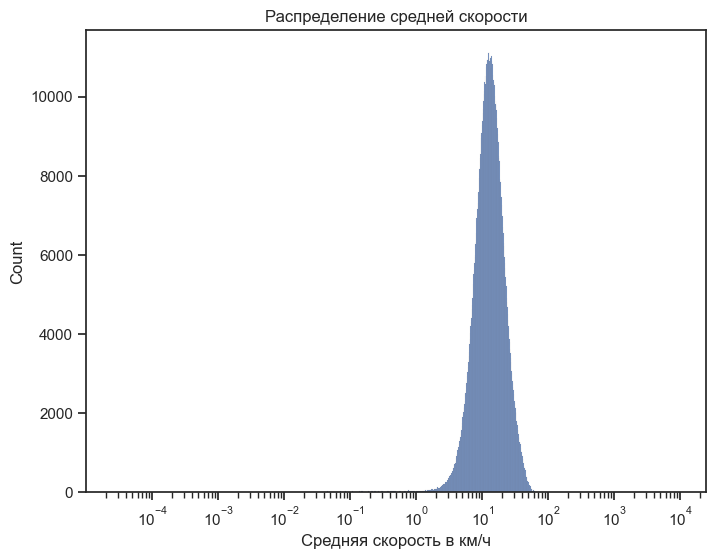

In [431]:
tmp = pd.concat([X_train_pd[['haversine']], y_train_pd], axis=1)
tmp['avarage_speed'] = tmp['haversine'] / (np.exp(tmp['log_trip_duration']) - 1) * 3600 # чтобы было в км/час

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Распределение средней скорости')
ax.set_xlabel('Средняя скорость в км/ч')
sns.histplot(
    x=tmp['avarage_speed'],
    log_scale=True,
    palette="light:m_r",
    edgecolor=".3",
    ax=ax
)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/2571211148.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


<Axes: title={'center': 'Распределение средней скорости для нормисов'}, xlabel='Средняя скорость в км/ч', ylabel='Count'>

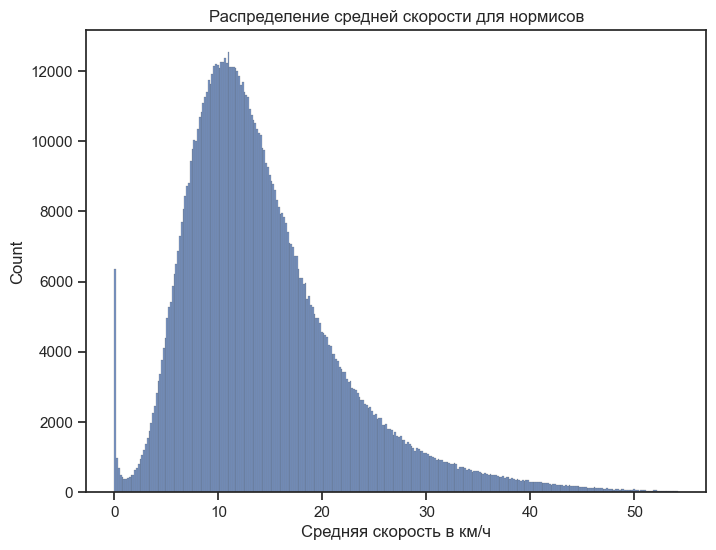

In [432]:
fig, ax = plt.subplots(figsize=(8, 6))
threshold = np.quantile(tmp['avarage_speed'], 0.999) # на всякий убрали все самолеты со скоростью 10000км/ч и спидигонщиков 
ax.set_title('Распределение средней скорости для нормисов')
ax.set_xlabel('Средняя скорость в км/ч')
sns.histplot(
    x=tmp['avarage_speed'],
    # log_scale=True,
    binrange=(0, threshold),
    palette="light:m_r",
    edgecolor=".3",
    ax=ax
)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<Axes: title={'center': 'Медианы скорости км/ч'}, xlabel='hour', ylabel='weekday'>

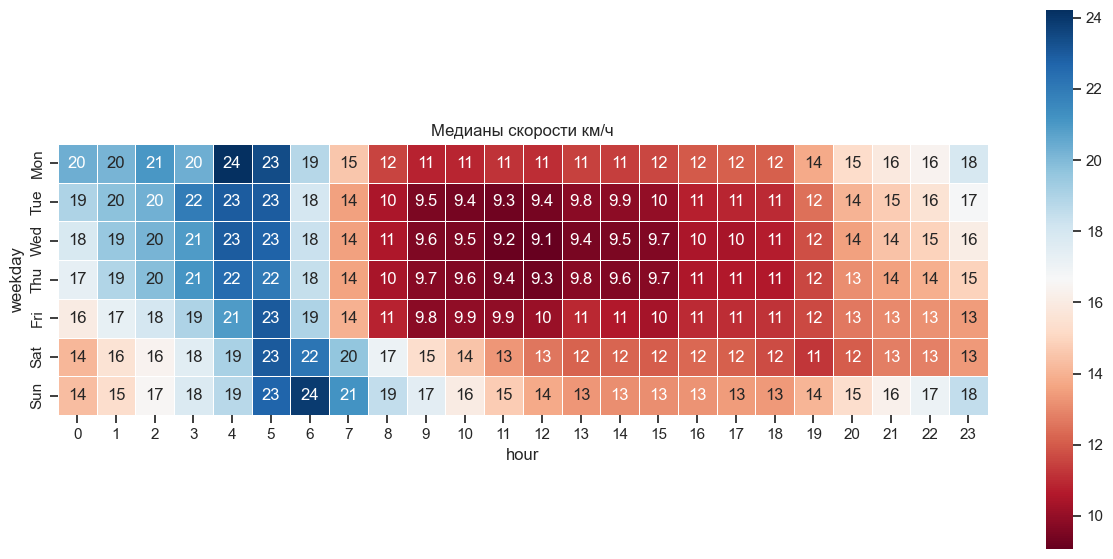

In [433]:
tmp2 = pd.concat([X_train_pd[['weekday', 'hour']], tmp[['avarage_speed']]], axis=1)
tmp2 = pl.from_pandas(tmp2) # потому что я даун pandas-а и хочу polars
df_heat = tmp2.group_by('weekday', 'hour').agg(pl.col('avarage_speed').median().alias('speed_median')).sort('hour')
df_heat = df_heat.to_pandas().pivot(index='weekday', columns='hour', values='speed_median')
days_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df_heat.index = pd.CategoricalIndex(df_heat.index, categories=days_order, ordered=True)
df_heat = df_heat.sort_index()

fig, ax = plt.subplots(figsize=(15,7)) 
ax.set_title('Медианы скорости км/ч')
sns.heatmap(df_heat, annot=True, square=True, linewidth=.5, cmap="RdBu")

ну тут красненьким заодно видим низкую средную скорость, скорее всего они стояли в пробках, вышло красиво

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

А скорость во время обучения нельзя использовать, потому что наша модель сможет точно считать растояние зная скорость и время, и нифига не будет обучаться, а просто подгонять значения по формуле $s = vt$

In [434]:
X_train_pd # а я не добавлял в train скорость я делал на отдельных таблицах остальные расчёты

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,anomaly_january,anomaly_may,haversine,log_haversine
0,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,9,5,Tue,124,0,0,1.263187,0.816774
1,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,16,1,Fri,1,0,0,4.804012,1.758549
2,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,13,4,Sun,115,0,0,7.471088,2.136659
3,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,17,1,Sun,10,0,0,3.444869,1.491750
4,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,17,2,Thu,56,0,0,2.481063,1.247338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,7,3,Fri,85,0,0,5.310383,1.842196
1021046,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,18,2,Tue,47,0,0,1.783777,1.023809
1021047,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,19,1,Tue,26,0,0,7.407646,2.129142
1021048,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,11,1,Tue,19,0,0,0.642215,0.496046


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Для начала разделим дни на будни и выходные

В будни минимальная скорость в промежутках с 8:00 до 19:00, максимальна - с 00:00 до 6:00

В выходные минимальная (минимальная среди выходных дней, она не самая маленькая в приниципе) скорость в промежутках с 12:00 до 19:00, максимальна - с 4:00 до 8:00

Если абсолютные минимальные значения, то минимальная это среда 12:00, а максимальная - понедельник 4:00

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [435]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
X_train_pd['rush_hour'] = 0
X_train_pd.loc[(X_train_pd['weekday'].isin(weekday)) & (8 <= X_train_pd['hour']) & (19 >= X_train_pd['hour']), 'rush_hour'] = 1
X_train_pd['clear_road'] = 0
X_train_pd.loc[((~X_train_pd['weekday'].isin(weekday)) & (4 <= X_train_pd['hour']) & (8 >= X_train_pd['hour'])) | 
               ((X_train_pd['weekday'].isin(weekday)) & (0 <= X_train_pd['hour']) & (6 >= X_train_pd['hour'])), 'clear_road'] = 1
# bbb = pl.from_pandas(X_train_pd)
# bbb.filter(pl.col('clear_road') == 1) просто проверка 

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [436]:
# координаты брал из википедии
JFK = [40.639722, -73.778889]
LaGuardia = [40.775, -73.875]
X_train_pd['airport_started'] = 0
X_train_pd['airport_ended'] = 0
# проверим что растояние от точки начала и конца поездки находится в радиусе 1км от координат аэропорта
X_train_pd.loc[(haversine_array(X_train_pd['pickup_latitude'], X_train_pd['pickup_longitude'], JFK[0], JFK[1]) <= 1), 'airport_started'] = 1 
X_train_pd.loc[(haversine_array(X_train_pd['pickup_latitude'], X_train_pd['pickup_longitude'], LaGuardia[0], LaGuardia[1]) <= 1), 'airport_started'] = 1
X_train_pd.loc[(haversine_array(X_train_pd['dropoff_latitude'], X_train_pd['dropoff_longitude'], JFK[0], JFK[1]) <= 1), 'airport_ended'] = 1
X_train_pd.loc[(haversine_array(X_train_pd['dropoff_latitude'], X_train_pd['dropoff_longitude'], LaGuardia[0], LaGuardia[1]) <= 1), 'airport_ended'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/2338149837.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='rush_hour', y='log_trip_duration', ax=ax1, palette=['pink', 'lightblue'])
/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/2338149837.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='clear_road', y='log_trip_duration', ax=ax2, palette=['pink', 'lightblue'])
/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/2338149837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

<Axes: title={'center': 'Распределение логарифма времени поездки от airport_ended'}, xlabel='airport_ended', ylabel='log_trip_duration'>

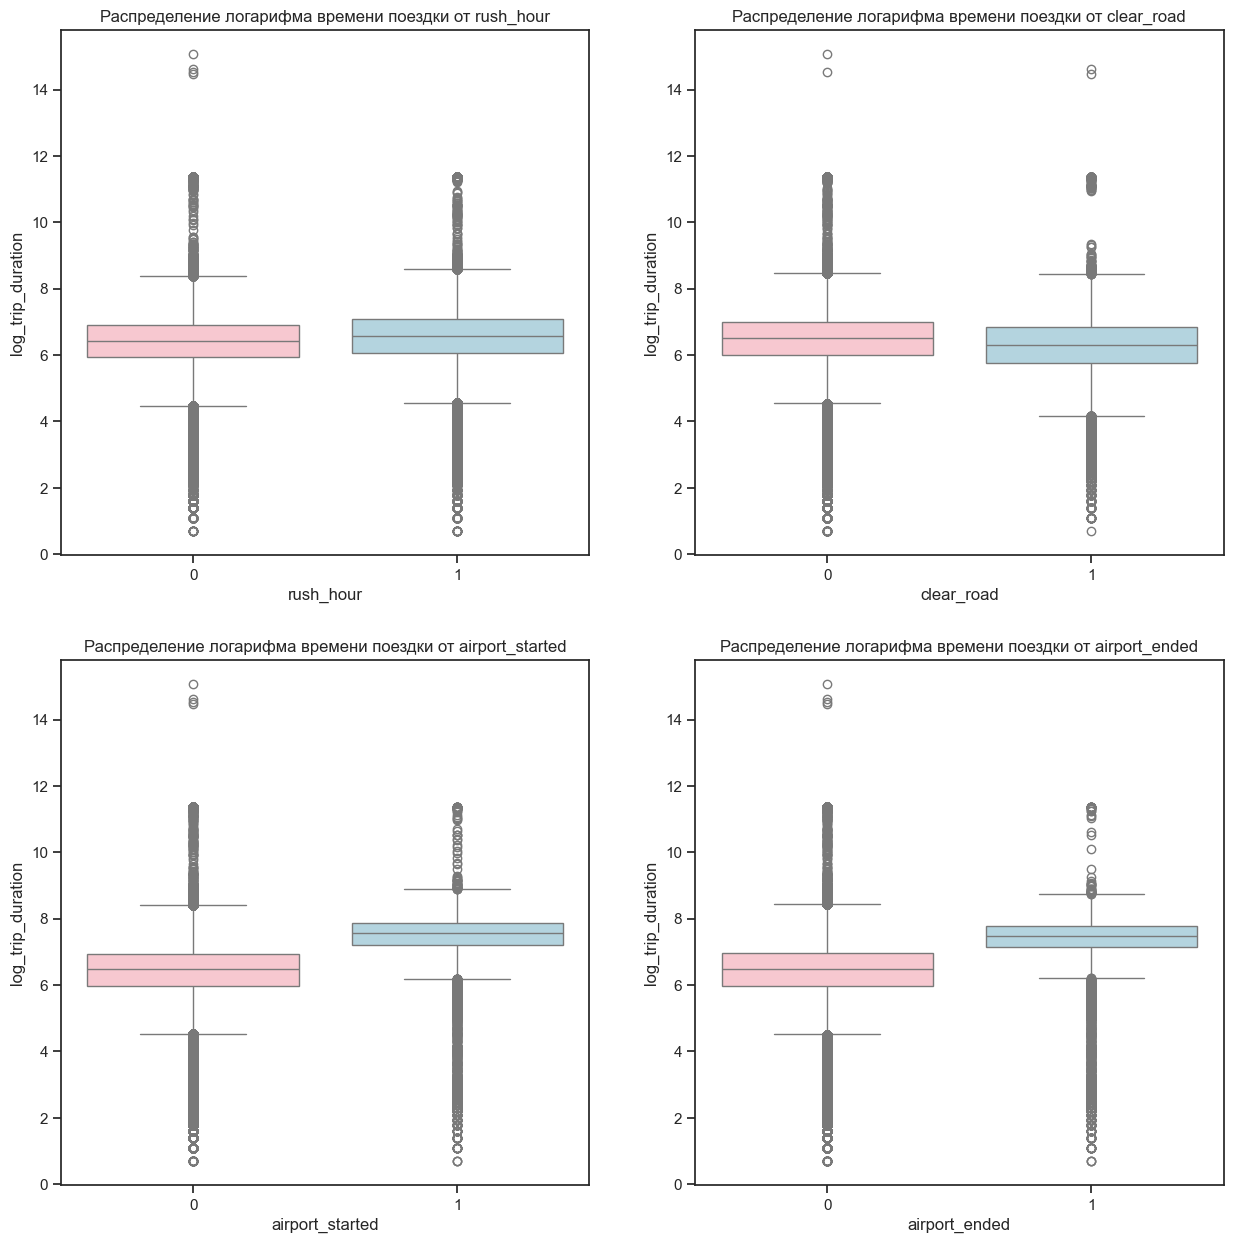

In [437]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]
ax1.set_title('Распределение логарифма времени поездки от rush_hour')
ax2.set_title('Распределение логарифма времени поездки от clear_road')
ax3.set_title('Распределение логарифма времени поездки от airport_started')
ax4.set_title('Распределение логарифма времени поездки от airport_ended')

sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='rush_hour', y='log_trip_duration', ax=ax1, palette=['pink', 'lightblue'])
sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='clear_road', y='log_trip_duration', ax=ax2, palette=['pink', 'lightblue'])
sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='airport_started', y='log_trip_duration', ax=ax3, palette=['pink', 'lightblue'])
sns.boxplot(pd.concat([X_train_pd, y_train_pd], axis=1), x='airport_ended', y='log_trip_duration', ax=ax4, palette=['pink', 'lightblue'])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Для признков относящихся к поездкам из аэропорта и в аэропорт кластеризовать имеет смысл, среднее время логарифма поездки выше если признак с положительным флагом, что логично и мы пояснили выше. Для rush и free особых отличий нет, поэтому можно не выделять отдельным признаком  

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [438]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows = 12, cols = 5):
        self.rows = rows
        self.cols = cols
        # координаты нашего прямоугольника
        self.l_long = 0
        self.r_long = 0
        self.up_lat = 0
        self.down_lat = 0
        # информация о клетках
        self.hight = 0
        self.width = 0
        # данные из датасета
        # self.longitudes = None 
        # self.latitudes = None
        pass

    def show_map(self):
        location = ((self.up_lat + self.down_lat) / 2, (self.r_long + self.l_long) / 2) # центр нашего прямоугольника
        m = folium.Map(location=location)
        #края прямоугольника 
        folium.Rectangle( 
            bounds=[[self.up_lat, self.l_long], [self.down_lat, self.r_long]],
            color='red'
            ).add_to(m)
            
        #вертикальные линии 
        for i in range(1, self.cols):
            folium.PolyLine( 
                locations=([self.up_lat, self.l_long + self.width * i], [self.down_lat, self.l_long + self.width * i]),
                color='red',
                ).add_to(m)
            
        #горизонтальные линии
        for i in range(1, self.rows):
            folium.PolyLine( 
                locations=([self.up_lat - self.height * i, self.l_long], [self.up_lat - self.height * i, self.r_long]),
                color='red'
                ).add_to(m)
        return m

    def fit(self, X=None, y=None):
        # списрк всех долгот и широт
        longitudes = pd.concat([X['dropoff_longitude'], X['pickup_longitude']], ignore_index=True)
        latitudes = pd.concat([X['pickup_latitude'], X['dropoff_latitude']], ignore_index=True)
        # с помощью квантилей отбросим не популярные, и возьмём их границы для нашего прямоугольника
        self.l_long = np.quantile(longitudes, 0.05)
        self.r_long = np.quantile(longitudes, 0.95)
        self.down_lat = np.quantile(latitudes, 0.03)
        self.up_lat = np.quantile(latitudes, 0.97)
        self.width = (self.r_long - self.l_long) / self.cols
        self.height = (self.up_lat - self.down_lat) / self.rows
        return self

    def transform(self, X, y=None):
        x = X.copy()
        x['picup_cell'] = -1 
        x['dropoff_cell'] = -1
       
        
        cond_pick = (
            (X['pickup_latitude'] <= self.up_lat) &
            (x['pickup_latitude'] >= self.down_lat) &
            (x['pickup_longitude'] >= self.l_long) &
            (x['pickup_longitude'] <= self.r_long)
        )
        x.loc[cond_pick, 'picup_cell'] = (
            ((x.loc[cond_pick, 'pickup_latitude'] - self.down_lat) // self.height) * self.cols + 
            ((x.loc[cond_pick, 'pickup_longitude'] - self.l_long) // self.width)
        )
        
        cond_drop = (
            (x['dropoff_latitude'] <= self.up_lat) &
            (x['dropoff_latitude'] >= self.down_lat) &
            (x['dropoff_longitude'] >= self.l_long) &
            (x['dropoff_longitude'] <= self.r_long)
        )
        
        x.loc[cond_drop, 'dropoff_cell'] = (
            ((x.loc[cond_drop, 'dropoff_latitude'] - self.down_lat) // self.height) * self.cols +
            ((x.loc[cond_drop, 'dropoff_longitude'] - self.l_long) // self.width)
        )
        
        return x

In [439]:
MapGridTransformer().fit(X_train_pd).show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

Добавим все метрики в наш test dataset, зачем мы делили в начале, я не понимаю

In [440]:
X_test_pd['rush_hour'] = 0
X_test_pd.loc[(X_test_pd['weekday'].isin(weekday)) & (8 <= X_test_pd['hour']) & (19 >= X_test_pd['hour']), 'rush_hour'] = 1
X_test_pd['clear_road'] = 0
X_test_pd.loc[((~X_test_pd['weekday'].isin(weekday)) & (4 <= X_test_pd['hour']) & (8 >= X_test_pd['hour'])) | 
               ((X_test_pd['weekday'].isin(weekday)) & (0 <= X_test_pd['hour']) & (6 >= X_test_pd['hour'])), 'clear_road'] = 1
X_test_pd['airport_started'] = 0
X_test_pd['airport_ended'] = 0
# проверим что растояние от точки начала и конца поездки находится в радиусе 1км от координат аэропорта
X_test_pd.loc[(haversine_array(X_test_pd['pickup_latitude'], X_test_pd['pickup_longitude'], JFK[0], JFK[1]) <= 1), 'airport_started'] = 1 
X_test_pd.loc[(haversine_array(X_test_pd['pickup_latitude'], X_test_pd['pickup_longitude'], LaGuardia[0], LaGuardia[1]) <= 1), 'airport_started'] = 1
X_test_pd.loc[(haversine_array(X_test_pd['dropoff_latitude'], X_test_pd['dropoff_longitude'], JFK[0], JFK[1]) <= 1), 'airport_ended'] = 1
X_test_pd.loc[(haversine_array(X_test_pd['dropoff_latitude'], X_test_pd['dropoff_longitude'], LaGuardia[0], LaGuardia[1]) <= 1), 'airport_ended'] = 1

In [476]:
X2_train = X_train_pd.drop(columns=['vendor_id', 'pickup_datetime', 'passenger_count', 'store_and_fwd_flag']) # вторая модель
X2_test = X_test_pd.drop(columns=['vendor_id', 'pickup_datetime', 'passenger_count', 'store_and_fwd_flag'])
X2_train = MapGridTransformer().fit_transform(X2_train)
X2_test = MapGridTransformer().fit_transform(X2_test)
categorical = ['weekday', 'month', 'anomaly_january', 'anomaly_may', 'rush_hour', 'clear_road', 'airport_started', 'airport_ended', 'picup_cell', 'dropoff_cell']
numeric_features = ['hour', 'day', 'log_haversine']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline2 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model2 = pipeline2.fit(X2_train, y_train_pd)
y_pred = model2.predict(X2_test)
pl.DataFrame({'Prediction': y_pred, 'Real': y_test_pd})

Prediction,Real
f64,f64
6.681269,6.947937
6.332384,6.719013
6.061631,6.421622
6.65812,6.766192
8.753423,8.510773
…,…
6.536348,6.717805
6.039176,6.163315
5.938169,6.171701


In [477]:
print("RMSE второй модели = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE второй модели =  0.477039346554555


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [478]:
ven_id = df.select('vendor_id').n_unique()
pass_cnt = df.select('passenger_count').n_unique()
s_a_f_f = df.select('store_and_fwd_flag').n_unique()

print('Уникальных значений в стобце vendor_id: ', ven_id) 
print('Уникальных значений в стобце passenger_count: ', pass_cnt) 
print('Уникальных значений в стобце store_and_fwd_flag: ', s_a_f_f) 

Уникальных значений в стобце vendor_id:  2
Уникальных значений в стобце passenger_count:  10
Уникальных значений в стобце store_and_fwd_flag:  2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: title={'center': 'Распределений логарифма времени поездки в зависимости от vendor_id'}, xlabel='vendor_id', ylabel='log_trip_duration'>

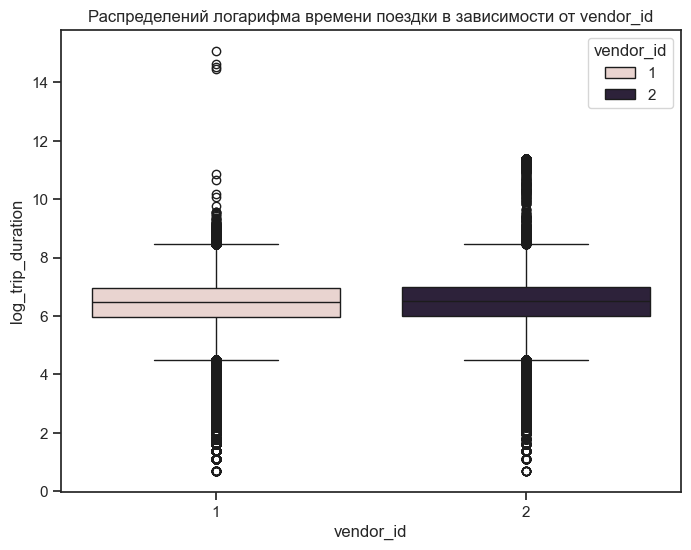

In [444]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Распределений логарифма времени поездки в зависимости от vendor_id')
sns.boxplot(df, 
            x='vendor_id',
            y='log_trip_duration',
            ax=ax,
            hue='vendor_id')

<Axes: title={'center': 'Распределений логарифма времени поездки в зависимости от passenger_count'}, xlabel='passenger_count', ylabel='log_trip_duration'>

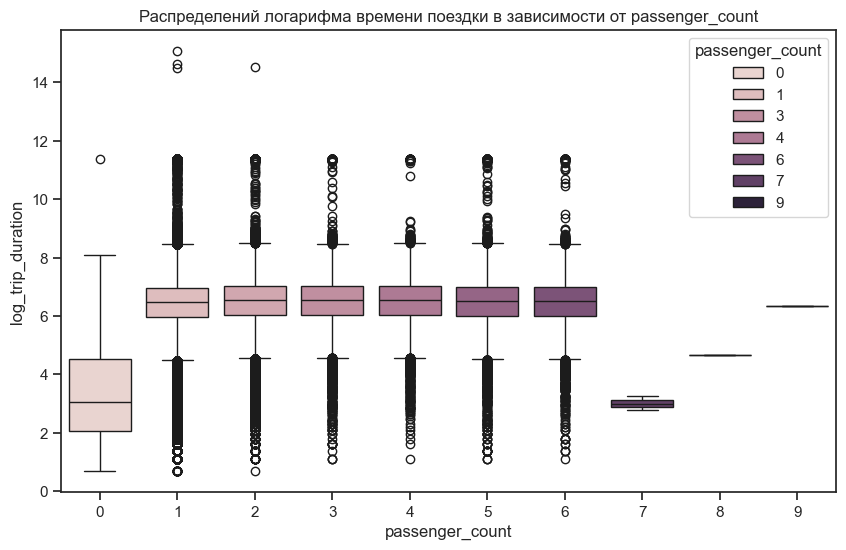

In [445]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределений логарифма времени поездки в зависимости от passenger_count')
sns.boxplot(df, 
            x='passenger_count',
            y='log_trip_duration',
            ax=ax,
            hue='passenger_count') 


<Axes: title={'center': 'Распределений логарифма времени поездки в зависимости от store_and_fwd_flag'}, xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

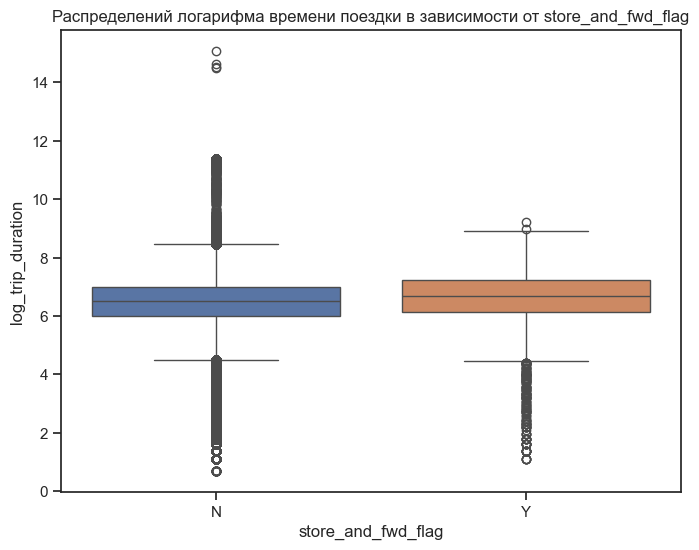

In [446]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Распределений логарифма времени поездки в зависимости от store_and_fwd_flag')
sns.boxplot(df, 
            x='store_and_fwd_flag',
            y='log_trip_duration',
            ax=ax,
            hue='store_and_fwd_flag')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [456]:
X3_train = X_train_pd.copy() # чтобы если я запустил случайно этот блок, у меня не менлся X_train_pd и я не запускал всё заново
X3_test = X_test_pd.copy()
X3_train['vendor_id'].replace({2:1, 1:0}, inplace=True)
X3_train['store_and_fwd_flag'].replace({'N': 1, 'Y': 0}, inplace=True)
X3_test['vendor_id'].replace({2:1, 1:0}, inplace=True)
X3_test['store_and_fwd_flag'].replace({'N': 1, 'Y': 0}, inplace=True)

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/3982319015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X3_train['vendor_id'].replace({2:1, 1:0}, inplace=True)
/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/3982319015.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

На самом деле распределения получились почти одинаковые, за исключаением поездок, где 0 и 7-9 пассажиров (тут может помочь), а в остальных случаях наверно поможет минимально, кроме того не очень понятно как признаки store_and_fwd_flag и vendor_id могут повлиять на длину поездки

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [471]:
X3_train = MapGridTransformer().fit_transform(X3_train)
X3_test = MapGridTransformer().fit_transform(X3_test)
categorical = ['weekday', 'month', 'anomaly_january', 'anomaly_may', 'rush_hour', 'clear_road', 'airport_started',
               'airport_ended', 'picup_cell', 'dropoff_cell', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['hour', 'day', 'log_haversine']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline3 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model3 = pipeline3.fit(X3_train, y_train)
y_pred = model3.predict(X3_test)
pl.DataFrame({'Prediction': y_pred, 'Real': y_test_pd})

Prediction,Real
f64,f64
6.683203,6.947937
6.332611,6.719013
6.072276,6.421622
6.688101,6.766192
8.780397,8.510773
…,…
6.546149,6.717805
6.019295,6.163315
5.95045,6.171701


In [472]:
print("RMSE третьей модели = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE третьей модели =  0.47660252132775927


In [473]:
print(0.477039346554555 - 0.47660252132775927)

0.0004368252267957229


Ну на 4 десятитысячные мы улучшили ура, но собсвенно как и предполагалось особо не помогло

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

ощутимого они не дали, но я их добавил в временный датасет, поэтому даже убирать не надо

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [532]:
X3_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,...,anomaly_january,anomaly_may,haversine,log_haversine,rush_hour,clear_road,airport_started,airport_ended,picup_cell,dropoff_cell
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,1,9,...,0,0,1.263187,0.816774,1,0,0,0,36,41
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,1,16,...,0,0,4.804012,1.758549,1,0,0,0,31,52
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,1,13,...,0,0,7.471088,2.136659,0,0,0,0,48,-1
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,1,17,...,0,0,3.444869,1.491750,0,0,0,0,16,31
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,1,17,...,0,0,2.481063,1.247338,1,0,0,0,42,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,1,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,1,7,...,0,0,5.310383,1.842196,0,0,0,0,47,30
1021046,id2204747,0,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,1,18,...,0,0,1.783777,1.023809,1,0,0,0,41,31
1021047,id3043606,1,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,1,19,...,0,0,7.407646,2.129142,1,0,0,0,25,53
1021048,id1458584,0,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,1,11,...,0,0,0.642215,0.496046,1,0,0,0,42,42


<Axes: title={'center': 'Распределение остатков ridge второй модели'}, xlabel='residuals', ylabel='Count'>

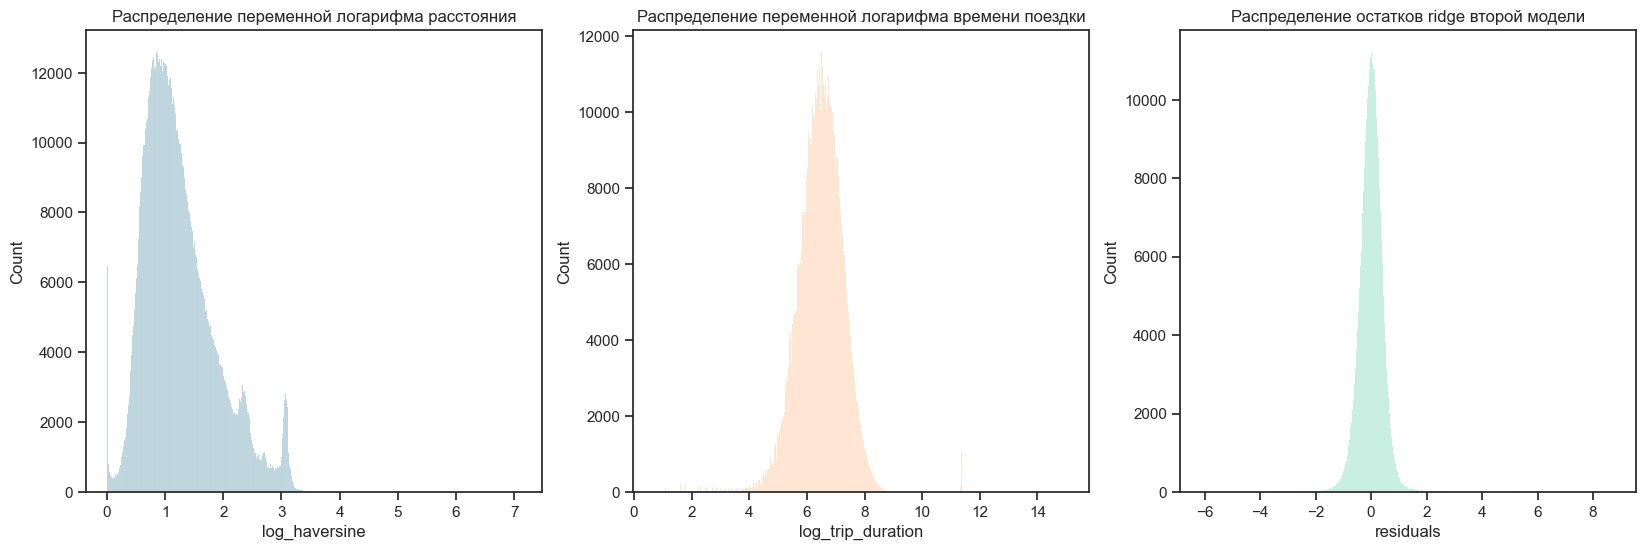

In [533]:
tmp = pd.concat([X3_train, y_train_pd], axis=1)  # для графиокв

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.set_title('Распределение переменной логарифма расстояния')
ax2.set_title('Распределение переменной логарифма времени поездки')
ax3.set_title('Распределение остатков ridge второй модели') # не берем 3-юю потому что она особо нам ничего не дала
residuals = (y_train_pd - model2.predict(X2_train)).rename('residuals') # смотрим выбрасы на train
sns.histplot(
    data=tmp,
    x='log_haversine',
    ax=ax1,
    color='#9EC1CF'
)
sns.histplot(
    data=tmp,
    x='log_trip_duration',
    ax=ax2,
    color='#FFDDC1'
)
sns.histplot(
    residuals,
    ax=ax3,
    color='#B5EAD7'
)
# за красивые цвета спасибо GPT

In [560]:
X4_train = pd.concat([X3_train, residuals, y_train_pd], axis=1)
X4_train
# будем проверять на уровне значимости 1 процент, путём тестов на графиках проверил
left_haversine= np.quantile(X4_train['log_haversine'], 0.005) 
right_haversine = np.quantile(X4_train['log_haversine'], 0.995) # ну тут взял меньше одного процента, так получилось получше
left_trip = np.quantile(X4_train['log_trip_duration'], 0.002)  
right_trip = np.quantile(X4_train['log_trip_duration'], 0.998)
left_residuals = np.quantile(X4_train['residuals'], 0.005) 
right_residuals = np.quantile(X4_train['residuals'], 0.995)

threshold = ((X4_train['log_haversine'] >= left_haversine) & 
    (X4_train['log_haversine'] <= right_haversine) &
    (X4_train['log_trip_duration'] >= left_trip) & 
    (X4_train['log_trip_duration'] <= right_trip) &
    (X4_train['residuals'] >= left_residuals) &
    (X4_train['residuals'] <= right_residuals)
)

Restricted_X4_train = X4_train[threshold]
Restricted_X4_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,...,haversine,log_haversine,rush_hour,clear_road,airport_started,airport_ended,picup_cell,dropoff_cell,residuals,log_trip_duration
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,1,9,...,1.263187,0.816774,1,0,0,0,36,41,0.371417,6.739337
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,1,16,...,4.804012,1.758549,1,0,0,0,31,52,-0.152286,6.909753
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,1,13,...,7.471088,2.136659,0,0,0,0,48,-1,-0.147976,6.955593
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,1,17,...,3.444869,1.491750,0,0,0,0,16,31,-0.009458,6.665684
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,1,17,...,2.481063,1.247338,1,0,0,0,42,51,0.119138,6.597146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,1,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,1,7,...,5.310383,1.842196,0,0,0,0,47,30,0.071540,7.156177
1021046,id2204747,0,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,1,18,...,1.783777,1.023809,1,0,0,0,41,31,0.221124,6.726233
1021047,id3043606,1,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,1,19,...,7.407646,2.129142,1,0,0,0,25,53,-0.246096,7.159292
1021048,id1458584,0,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,1,11,...,0.642215,0.496046,1,0,0,0,42,42,0.192956,5.966147


Посмотрим что станет с распределениями, если убрать выбросы

P.S тут я смотрел на графики и подбирал квантили

<Axes: title={'center': 'Распределение остатков ridge второй модели'}, xlabel='residuals', ylabel='Count'>

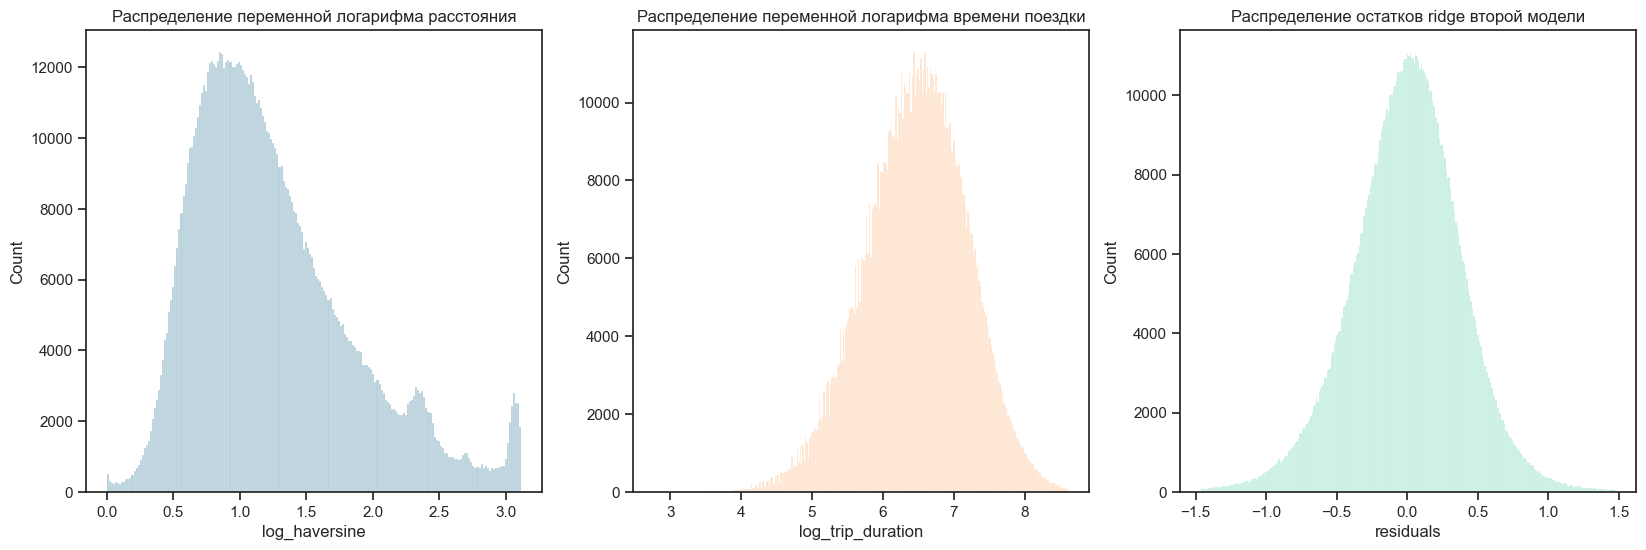

In [535]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.set_title('Распределение переменной логарифма расстояния')
ax2.set_title('Распределение переменной логарифма времени поездки')
ax3.set_title('Распределение остатков ridge второй модели') # не берем 3-юю потому что она особо нам ничего не дала
sns.histplot(
    data=Restricted_X4_train,
    x='log_haversine',
    ax=ax1,
    color='#9EC1CF'
)
sns.histplot(
    data=Restricted_X4_train,
    x='log_trip_duration',
    ax=ax2,
    color='#FFDDC1'
)
sns.histplot(
    Restricted_X4_train['residuals'],
    ax=ax3,
    color='#B5EAD7'
)

In [561]:
Restricted_X4_train = Restricted_X4_train.drop(['residuals'], axis=1)
Restricted_y_train = Restricted_X4_train['log_trip_duration']
RX4 = pl.from_pandas(Restricted_X4_train)
Restricted_X4_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,...,anomaly_may,haversine,log_haversine,rush_hour,clear_road,airport_started,airport_ended,picup_cell,dropoff_cell,log_trip_duration
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,1,9,...,0,1.263187,0.816774,1,0,0,0,36,41,6.739337
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,1,16,...,0,4.804012,1.758549,1,0,0,0,31,52,6.909753
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,1,13,...,0,7.471088,2.136659,0,0,0,0,48,-1,6.955593
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,1,17,...,0,3.444869,1.491750,0,0,0,0,16,31,6.665684
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,1,17,...,0,2.481063,1.247338,1,0,0,0,42,51,6.597146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,id1753868,1,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,1,7,...,0,5.310383,1.842196,0,0,0,0,47,30,7.156177
1021046,id2204747,0,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,1,18,...,0,1.783777,1.023809,1,0,0,0,41,31,6.726233
1021047,id3043606,1,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,1,19,...,0,7.407646,2.129142,1,0,0,0,25,53,7.159292
1021048,id1458584,0,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,1,11,...,0,0.642215,0.496046,1,0,0,0,42,42,5.966147


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [538]:

RX4.group_by('hour').agg(pl.col('id').count())

hour,id
i8,u32
18,62583
21,58033
0,36882
12,49740
9,46624
…,…
8,46303
17,52623
23,47777


In [539]:
RX4.group_by('month').agg(pl.col('id').count())

month,id
i8,u32
3,176598
6,161018
4,173031
1,158090
5,170388
2,163889


In [541]:
RX4.group_by('weekday').agg(pl.col('id').count())

weekday,id
str,u32
"""Sat""",151927
"""Sun""",134139
"""Mon""",128726
"""Wed""",144350
"""Tue""",139780
"""Fri""",153863
"""Thu""",150229


Тут их много, так что объеденить не получится

In [542]:
RX4.group_by('anomaly_january').agg(pl.col('id').count())

anomaly_january,id
i32,u32
0,999551
1,3463


In [543]:
RX4.group_by('anomaly_may').agg(pl.col('id').count())

anomaly_may,id
i32,u32
0,999182
1,3832


А вот аномальных дней мало, поэтому можно объеденить

In [544]:
RX4.group_by('rush_hour').agg(pl.col('id').count())

rush_hour,id
i64,u32
0,561436
1,441578


In [545]:
RX4.group_by('clear_road').agg(pl.col('id').count())

clear_road,id
i64,u32
0,902916
1,100098


Тут их достаточно, поэтому не трогаем 

In [516]:
RX4.group_by('airport_started').agg(pl.col('id').count())

airport_started,id
i64,u32
0,976835
1,26179


In [546]:
RX4.group_by('airport_ended').agg(pl.col('id').count())

airport_ended,id
i64,u32
0,990069
1,12945


Поездок начинающихся и заканчивающихся в аэропорту мало, можно объеденить

In [562]:
Restricted_X4_train = (RX4.with_columns((pl.col('airport_started').or_(pl.col('airport_ended'))).alias('airport'),
                    (pl.col('anomaly_january').or_(pl.col('anomaly_may')).alias('anomaly')))
                    .drop('anomaly_january', 'anomaly_may', 'airport_started', 'airport_ended', 'log_trip_duration', 'id', 'pickup_datetime', 'haversine')
).to_pandas()
Restricted_X4_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,log_haversine,rush_hour,clear_road,picup_cell,dropoff_cell,airport,anomaly
0,1,2,-73.979813,40.752529,-73.982681,40.763680,1,9,5,Tue,124,0.816774,1,0,36,41,0,0
1,0,1,-73.977623,40.746296,-73.968414,40.788933,1,16,1,Fri,1,1.758549,1,0,31,52,0,0
2,0,1,-73.950699,40.779404,-73.863129,40.768608,1,13,4,Sun,115,2.136659,0,0,48,-1,0,0
3,1,1,-73.984558,40.721802,-73.976753,40.752213,1,17,1,Sun,10,1.491750,0,0,16,31,0,0
4,0,1,-73.967720,40.768742,-73.977173,40.789875,1,17,2,Thu,56,1.247338,1,0,42,51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003009,1,2,-73.955032,40.777328,-74.006203,40.749424,1,7,3,Fri,85,1.842196,0,0,47,30,0,0
1003010,0,1,-73.973618,40.763920,-73.983849,40.749874,1,18,2,Tue,47,1.023809,1,0,41,31,0,0
1003011,1,1,-74.006195,40.734283,-73.949608,40.785282,1,19,1,Tue,26,2.129142,1,0,25,53,0,0
1003012,0,1,-73.962341,40.767323,-73.969757,40.768669,1,11,1,Tue,19,0.496046,1,0,42,42,0,0


In [563]:
X4_test = pl.from_pandas(X3_test)
X4_test = (X4_test.with_columns((pl.col('airport_started').or_(pl.col('airport_ended'))).alias('airport'),
                    (pl.col('anomaly_january').or_(pl.col('anomaly_may')).alias('anomaly')))
                    .drop('anomaly_january', 'anomaly_may', 'airport_started', 'airport_ended', 'id', 'pickup_datetime', 'haversine')
).to_pandas()
X4_test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,log_haversine,rush_hour,clear_road,picup_cell,dropoff_cell,airport,anomaly
0,1,1,-73.985611,40.735943,-73.980331,40.760468,1,7,6,Wed,160,1.325230,0,0,26,36,0,0
1,1,1,-73.978394,40.764351,-73.991623,40.749859,1,12,4,Sun,94,1.084912,0,0,41,30,0,0
2,1,5,-73.989059,40.744389,-73.973381,40.748692,1,2,6,Sun,157,0.877455,0,0,31,31,0,0
3,1,2,-73.990326,40.731136,-73.991264,40.748917,1,17,5,Thu,126,1.091473,1,0,20,30,0,0
4,0,4,-73.789497,40.646675,-73.987137,40.759232,1,17,5,Thu,133,3.083640,1,0,-1,36,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437589,0,2,-73.983505,40.766369,-73.984795,40.785965,1,17,5,Wed,146,1.157413,1,0,41,51,0,0
437590,0,1,-73.968147,40.800476,-73.953979,40.787643,1,11,6,Sat,163,1.050724,0,0,57,52,0,0
437591,1,5,-74.006210,40.733158,-73.997932,40.722610,1,6,5,Fri,141,0.860608,0,1,25,15,0,0
437592,0,2,-73.990089,40.728859,-73.991234,40.765404,1,22,3,Sun,66,1.622303,0,0,20,40,0,0


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [564]:
X4_train = MapGridTransformer().fit_transform(Restricted_X4_train)
X4_test = MapGridTransformer().fit_transform(X4_test)
categorical = ['weekday', 'month', 'anomaly', 'rush_hour', 'clear_road', 'airport', 'picup_cell', 'dropoff_cell', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['hour', 'day', 'log_haversine']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline4 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model4 = pipeline4.fit(X4_train, Restricted_y_train)
y_pred = model4.predict(X4_test)
pl.DataFrame({'Prediction': y_pred, 'Real': y_test_pd})

Prediction,Real
f64,f64
6.685145,6.947937
6.323711,6.719013
6.102318,6.421622
6.672531,6.766192
8.780169,8.510773
…,…
6.545874,6.717805
6.015678,6.163315
5.900326,6.171701


In [565]:
print("RMSE четвёртой модели = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE третьей модели =  0.4782725868679005


In [566]:
print(0.47660252132775927 - 0.4782725868679005)

-0.001670065540141208


Ну да, модель чуть ухудшилась, поскольку не подстраивается под выбросы, но должна по идее лучше описывать нормальные поездки

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [568]:
print('Было признков: ', Restricted_X4_train.shape[1])
print('Стало признков: ', column_transformer.transform(MapGridTransformer().fit_transform(Restricted_X4_train)).shape[1])

Было признков:  18
Стало признков:  155


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [569]:
from sklearn.linear_model import Lasso
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X4_train, Restricted_y_train)
y_pred = model.predict(X4_test)
print("RMSE четвёртой модели lasso= ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE третьей модели =  0.7950297154188196


Как-то грустно, RMSE слишком большой

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [573]:
X4_train_new, X4_val, y_train_new, y_val = train_test_split(X4_train, Restricted_y_train, test_size=0.2, random_state=42)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ....................alpha=0.0001;, score=-0.391 total time=   0.3s
[CV 2/10] END ....................alpha=0.0001;, score=-0.392 total time=   0.3s
[CV 3/10] END ....................alpha=0.0001;, score=-0.393 total time=   0.3s
[CV 4/10] END ....................alpha=0.0001;, score=-0.390 total time=   0.3s
[CV 5/10] END ....................alpha=0.0001;, score=-0.389 total time=   0.3s
[CV 6/10] END ....................alpha=0.0001;, score=-0.391 total time=   0.3s
[CV 7/10] END ....................alpha=0.0001;, score=-0.393 total time=   0.3s
[CV 8/10] END ....................alpha=0.0001;, score=-0.390 total time=   0.3s
[CV 9/10] END ....................alpha=0.0001;, score=-0.391 total time=   0.3s
[CV 10/10] END ...................alpha=0.0001;, score=-0.391 total time=   0.3s
[CV 1/10] END ....alpha=0.00021544346900318845;, score=-0.391 total time=   0.3s
[CV 2/10] END ....alpha=0.00021544346900318845

Text(0, 0.5, 'CV score')

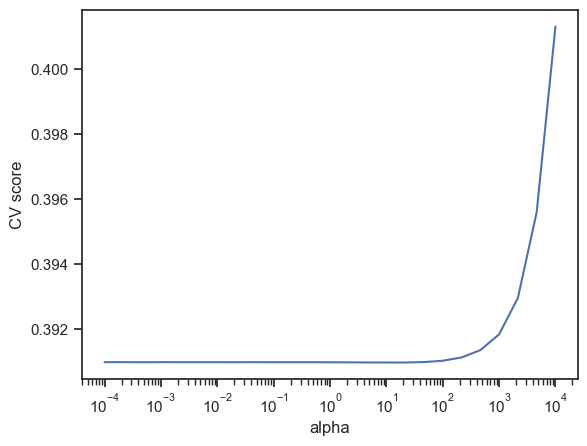

In [574]:
from sklearn.model_selection import GridSearchCV

X4_val_new = column_transformer.fit_transform(X4_val) 

# код с семинара
alphas = np.logspace(-4, 4, 25) # range мне подсказали, я замучался его подбирать
searcher_r = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, verbose=5) 
searcher_r.fit(X4_val_new, y_val)

best_alpha = searcher_r.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher_r.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ....................alpha=0.0001;, score=-0.392 total time=   2.3s
[CV 2/10] END ....................alpha=0.0001;, score=-0.392 total time=   2.3s
[CV 3/10] END ....................alpha=0.0001;, score=-0.393 total time=   2.2s
[CV 4/10] END ....................alpha=0.0001;, score=-0.390 total time=   2.2s
[CV 5/10] END ....................alpha=0.0001;, score=-0.389 total time=   2.2s
[CV 6/10] END ....................alpha=0.0001;, score=-0.391 total time=   2.3s
[CV 7/10] END ....................alpha=0.0001;, score=-0.393 total time=   2.2s
[CV 8/10] END ....................alpha=0.0001;, score=-0.390 total time=   2.1s
[CV 9/10] END ....................alpha=0.0001;, score=-0.391 total time=   2.2s
[CV 10/10] END ...................alpha=0.0001;, score=-0.391 total time=   2.2s
[CV 1/10] END ....alpha=0.00021544346900318845;, score=-0.392 total time=   1.1s
[CV 2/10] END ....alpha=0.00021544346900318845

Text(0, 0.5, 'CV score')

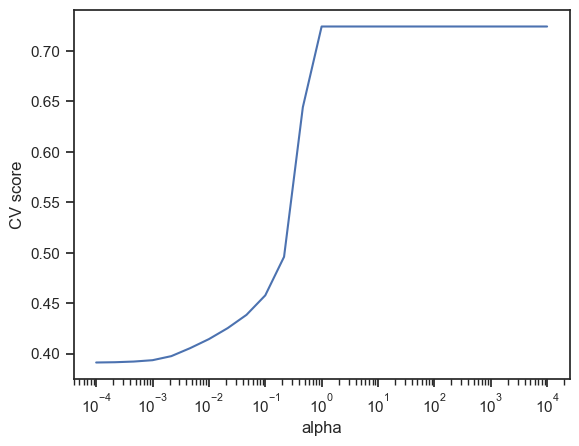

In [575]:
searcher_l = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, verbose=5)
searcher_l.fit(X4_val_new, y_val)

best_alpha = searcher_l.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher_l.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Лучшее $alpha$ для Ridge: 21.5443

Лучшее $alpha$ для Lasso: 0.0001

In [580]:
ridge_pipeline_alpha = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=21.5443))
])

model4_r = ridge_pipeline_alpha.fit(X4_train_new, y_train_new)
y_pred = model4_r.predict(X4_test)
print("RMSE четвёртой модели ridge с alpha = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE четвёртой модели ridge с alpha =  0.4782552156071326


In [581]:
lasso_pipeline_alpha = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.0001))
])

model4_l = lasso_pipeline_alpha.fit(X4_train_new, y_train_new)
y_pred = model4_l.predict(X4_test)
print("RMSE четвёртой модели lasso с alpha = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE четвёртой модели lasso с alpha =  0.47830701913552953


Почти одинаковые


Сохраните наилучшее значение, как бенчмарк на будущее

In [604]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.4782552156071326

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [583]:
nulls = []
for alpha in alphas:
    lasso_pipeline_alpha = Pipeline(steps=[
        ('regression', Lasso(alpha=alpha))
    ])
    model = lasso_pipeline_alpha.fit(column_transformer.fit_transform(X4_train_new), y_train_new)
    coef = model.named_steps['regression'].coef_
    nulls.append(len(coef[coef == 0]))

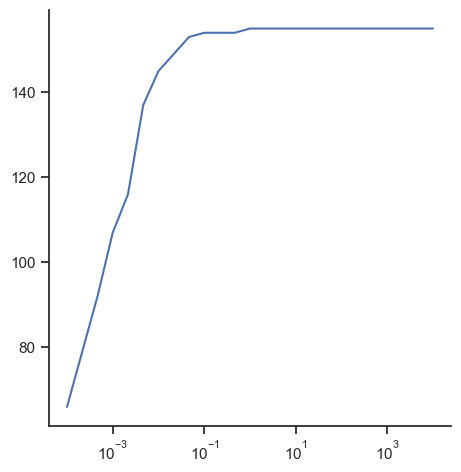

In [586]:
sns.relplot(x=alphas,
    y=nulls,
    kind='line'
).set(xscale='log') 

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Рассматривая самые частые пары будет лучше кластеризирована таргет переменная, чем если рассматривать просто начало и конец поездки в разных квадратах.

Модель сама не может это вытащить, так как рассматривает все переменные (в нашем случае начало и конец) как независимые, поэтому лучше их собрать вместе, потому что очевидно будет зависимость если маршруты начинались и заканчивались примерно в одном месте

In [587]:
X4_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,log_haversine,rush_hour,clear_road,picup_cell,dropoff_cell,airport,anomaly
0,1,2,-73.979813,40.752529,-73.982681,40.763680,1,9,5,Tue,124,0.816774,1,0,31,41,0,0
1,0,1,-73.977623,40.746296,-73.968414,40.788933,1,16,1,Fri,1,1.758549,1,0,31,52,0,0
2,0,1,-73.950699,40.779404,-73.863129,40.768608,1,13,4,Sun,115,2.136659,0,0,48,-1,0,0
3,1,1,-73.984558,40.721802,-73.976753,40.752213,1,17,1,Sun,10,1.491750,0,0,16,31,0,0
4,0,1,-73.967720,40.768742,-73.977173,40.789875,1,17,2,Thu,56,1.247338,1,0,42,51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003009,1,2,-73.955032,40.777328,-74.006203,40.749424,1,7,3,Fri,85,1.842196,0,0,48,30,0,0
1003010,0,1,-73.973618,40.763920,-73.983849,40.749874,1,18,2,Tue,47,1.023809,1,0,41,31,0,0
1003011,1,1,-74.006195,40.734283,-73.949608,40.785282,1,19,1,Tue,26,2.129142,1,0,20,53,0,0
1003012,0,1,-73.962341,40.767323,-73.969757,40.768669,1,11,1,Tue,19,0.496046,1,0,42,42,0,0


In [597]:
X5_train = X4_train.copy()
X5T = pl.from_pandas(X5_train).with_row_index('id') # просот я индексы дропнул для 4, поэтому надо вернуть
top100_cells = X5T.filter(
    (pl.col('picup_cell') != -1).and_(pl.col('dropoff_cell') != -1)
    ).group_by('picup_cell', 'dropoff_cell').agg(
        (pl.col('id').alias('count')).count()
        ).sort(by='count', descending=True).head(100).with_row_count('cells_pair')
top100_cells

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_3911/3540363255.py:7: DeprecationWarning: `DataFrame.with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  ).sort(by='count', descending=True).head(100).with_row_count('cells_pair')


cells_pair,picup_cell,dropoff_cell,count
u32,i64,i64,u32
0,31,36,8726
1,36,36,8470
2,36,31,8050
3,31,31,6734
4,26,31,6607
…,…,…,…
95,21,25,2388
96,35,31,2373
97,15,15,2355


In [598]:
X5T = X5T.join(
    top100_cells.select('picup_cell', 'dropoff_cell', 'cells_pair'),
    on=['picup_cell', 'dropoff_cell'],
    how='left'
)

X5T = X5T.with_columns([
    pl.when(pl.col('cells_pair').is_not_null())
    .then(pl.col('cells_pair'))
    .otherwise(-1)
    .alias('cell_pair_numb')
]).drop('cells_pair')
X5_train = X5T.to_pandas()


X5Test = pl.from_pandas(X4_test).join(
    top100_cells.select('picup_cell', 'dropoff_cell', 'cells_pair'),
    on=['picup_cell', 'dropoff_cell'],
    how='left'
)
X5Test = X5Test.with_columns([
    pl.when(pl.col('cells_pair').is_not_null())
    .then(pl.col('cells_pair'))
    .otherwise(-1)
    .alias('cell_pair_numb')
]).drop('cells_pair')
X5_test = X5Test.to_pandas()

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [600]:
X5_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,month,weekday,day,log_haversine,rush_hour,clear_road,picup_cell,dropoff_cell,airport,anomaly,cell_pair_numb
0,0,1,2,-73.979813,40.752529,-73.982681,40.763680,1,9,5,Tue,124,0.816774,1,0,31,41,0,0,55
1,1,0,1,-73.977623,40.746296,-73.968414,40.788933,1,16,1,Fri,1,1.758549,1,0,31,52,0,0,-1
2,2,0,1,-73.950699,40.779404,-73.863129,40.768608,1,13,4,Sun,115,2.136659,0,0,48,-1,0,0,-1
3,3,1,1,-73.984558,40.721802,-73.976753,40.752213,1,17,1,Sun,10,1.491750,0,0,16,31,0,0,-1
4,4,0,1,-73.967720,40.768742,-73.977173,40.789875,1,17,2,Thu,56,1.247338,1,0,42,51,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003009,1003009,1,2,-73.955032,40.777328,-74.006203,40.749424,1,7,3,Fri,85,1.842196,0,0,48,30,0,0,-1
1003010,1003010,0,1,-73.973618,40.763920,-73.983849,40.749874,1,18,2,Tue,47,1.023809,1,0,41,31,0,0,52
1003011,1003011,1,1,-74.006195,40.734283,-73.949608,40.785282,1,19,1,Tue,26,2.129142,1,0,20,53,0,0,-1
1003012,1003012,0,1,-73.962341,40.767323,-73.969757,40.768669,1,11,1,Tue,19,0.496046,1,0,42,42,0,0,22


In [602]:
categorical = ['weekday', 'month', 'rush_hour', 'clear_road', 'picup_cell', 'dropoff_cell', 'airport', 'anomaly', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'cell_pair_numb']
numeric_features = ['hour', 'day', 'log_haversine']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline_alpha = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=46.4159))
])


model = ridge_pipeline_alpha.fit(X5_train, Restricted_y_train)
y_pred = model.predict(X5_test)
print("RMSE пятой модели ridge с alpha = ", mean_squared_error(y_test_pd, y_pred, squared=False))

RMSE пятой модели ridge с alpha =  0.4710659583149865


In [605]:
print(best_rmsle - 0.4710659583149865)

0.0071892572921460896


ура, мы изнасиловали нашу модель и понизили RMSE на 7 тысячных о боже

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

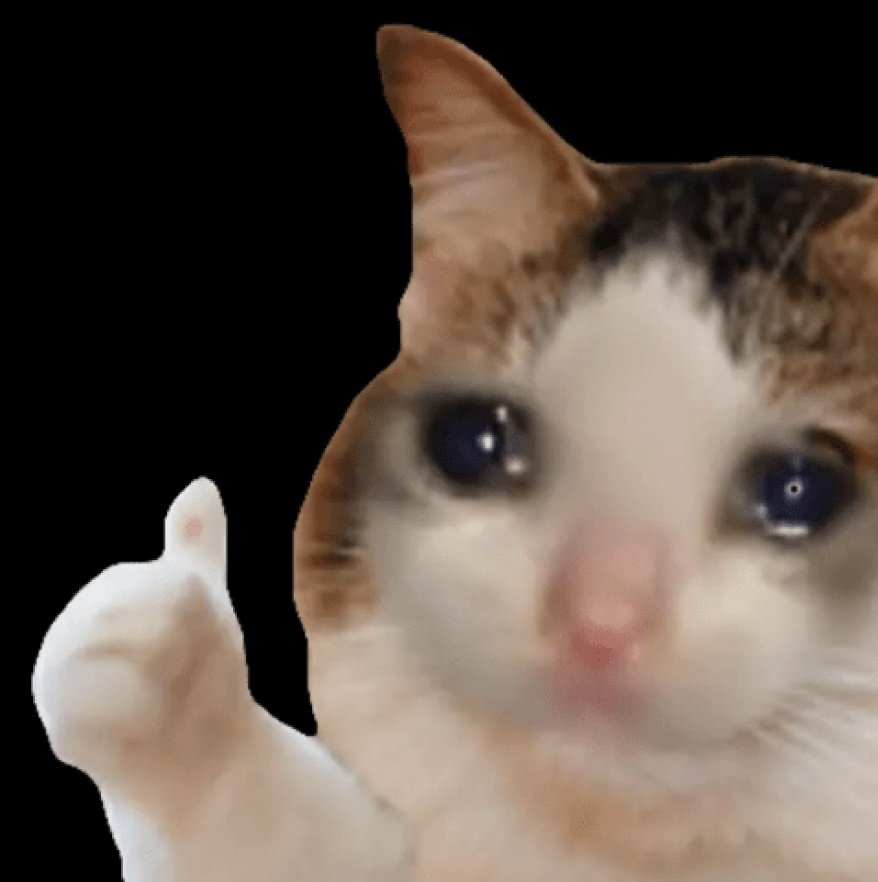